In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import datetime
from collections import Counter

In [3]:
virus_color_pallete = {'h1n1': '#0173b2',
                        'h3n2': '#56b4e9',
                        'rsv_a': '#d55e00',
                        'rsv_b': '#cc78bc',
                        'sars_cov_2_139': '#ece133', 
                        'sars_cov_2_122': '#A59D23',
                        'sars_cov_2_4964': '#029e73'
                        # 'victoria': '#029e73',
                        }

alignment_scores = ['match1_mis-1_o0_e0', 'match1_mis-1_o-2_e-2', 'match1_mis-1_o-5_e-1','match2_mis-1_o-5_e-1']


cols_scores = ['match_score', 'mismatch_score', 'open_gap_score', 'extend_gap_score']
set_scores_PairwiseAligner_df = pd.DataFrame([[1, -1, 0, 0], 
                                              [1, -1, -2, -2], 
                                              [1, -1, -5, -1] 
                                              ,[2, -1, -5, -1]
                                              ], 
                                              columns=cols_scores)

x = datetime.datetime.now()
date_generated = str(x.year) + '_' + str(x.month) + '_' + str(x.day)
# alebo d nastait rucne, ak zvolit iny datum ako dnesny
# date_generated = '2024_3_28'
# date_generated = '2024_4_16'
print(date_generated)

trimmers = ['_trimmomatic', '_cutadapt']
trimmer = trimmers[0]
print(trimmer)

sars_plots = False # True / False

param_used = ['headcrop', 'quality', 'minlen']


# set if analysing with minlen0
analyse_minlen0 = True # True / False 


if not analyse_minlen0:
    analyse_minlen0_path = 'nominlen0_'
else:
    analyse_minlen0_path = ''

def get_sars_plots_path(sars_plots):
    
    if sars_plots:
        sars_plots_path = '_sars'
    else:
        sars_plots_path = ''
    
    return sars_plots_path



2024_4_23
_trimmomatic


#generovanie iba pre SARS-COV-2 


./data/result_metrics/comparison_MBS_params_score/match1_mis-1_o-2_e-2/headcrop_match1_mis-1_o-2_e-2_2024_4_23_sars_cutadapt.png


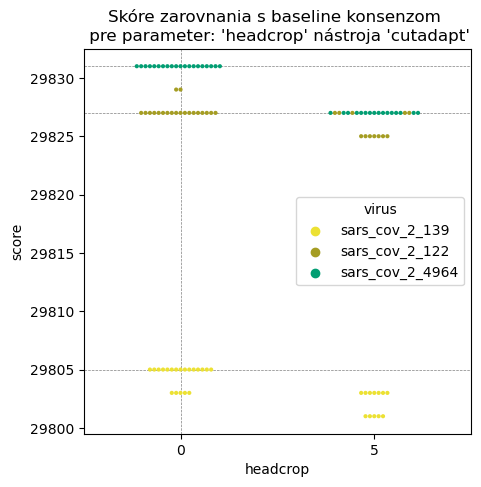

./data/result_metrics/comparison_MBS_params_score/match1_mis-1_o-2_e-2/quality_match1_mis-1_o-2_e-2_2024_4_23_sars_cutadapt.png


<Figure size 640x480 with 0 Axes>

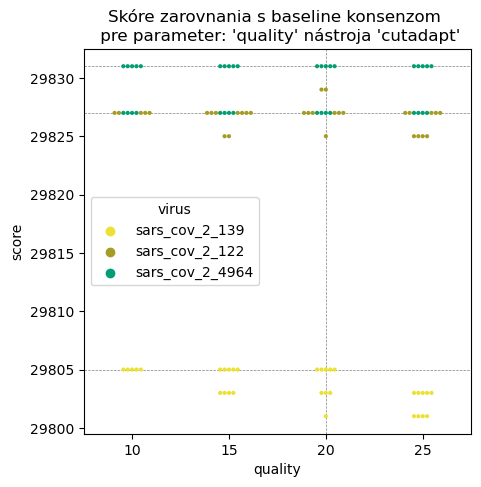

./data/result_metrics/comparison_MBS_params_score/match1_mis-1_o-2_e-2/minlen_match1_mis-1_o-2_e-2_2024_4_23_sars_cutadapt.png


<Figure size 640x480 with 0 Axes>

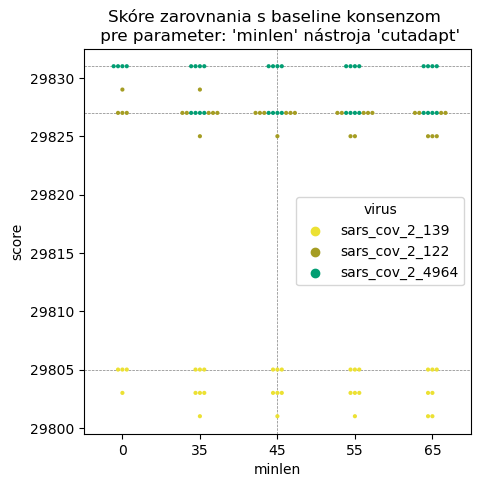

<Figure size 640x480 with 0 Axes>

In [8]:
# generovanie iba pre SARS-COV-2 

param_used_values = ['headcrop', 'quality', 'minlen']

for alignment_score in ['match1_mis-1_o-2_e-2']:

    path_to_rd_samples = './data/result_metrics/results_all_viruses/results_all_viruses_' + alignment_score + '_' + date_generated + trimmer + '.tsv'
    all_rd_samples = pd.read_csv(path_to_rd_samples, sep='\t')
    all_rd_samples = all_rd_samples[(all_rd_samples.virus == 'sars_cov_2_139') | (all_rd_samples.virus == 'sars_cov_2_122') | (all_rd_samples.virus == 'sars_cov_2_4964')]

    if not analyse_minlen0:
        all_rd_samples = all_rd_samples[all_rd_samples.minlen != 0]

    if trimmer == '_cutadapt':
        all_rd_samples = all_rd_samples[all_rd_samples.quality != 30]
        all_rd_samples = all_rd_samples[all_rd_samples.headcrop != 10]
    
    
    for param_used in param_used_values:
        
        if trimmer == '_cutadapt':
            plt.figure(figsize=(5,5))
        else:
            plt.figure(figsize=(8,8))
        
        plot_title = "Skóre zarovnania s baseline konsenzom \n pre parameter: '" + param_used + "' nástroja '" + trimmer.replace('_', '') + "'"
        sns.swarmplot(data=all_rd_samples, x=param_used, y="score", hue="virus", size=3, palette=virus_color_pallete)
        plt.axhline(y=all_rd_samples[all_rd_samples.consensus_baseline_virus == 'MBS_sars_cov_2_122']['score'].item(), color='grey', linestyle='--', linewidth=0.5)
        plt.axhline(y=all_rd_samples[all_rd_samples.consensus_baseline_virus == 'MBS_sars_cov_2_139']['score'].item(), color='grey', linestyle='--', linewidth=0.5)
        plt.axhline(y=all_rd_samples[all_rd_samples.consensus_baseline_virus == 'MBS_sars_cov_2_4964']['score'].item(), color='grey', linestyle='--', linewidth=0.5)



        #  headcrop:: mbs_param = 0, else mbs_param = 2, ale pri minlen ak je aj minlen0, tak posun na 2
        if param_used == 'headcrop':
            mbs_param = 0
        
        elif param_used == 'minlen':
            if analyse_minlen0:
                mbs_param = 2
            else:
                mbs_param = 1
        else: # quality
            mbs_param = 2

        plt.axvline(x=mbs_param, color='grey', linestyle='--', linewidth=0.5)

        plt.title(plot_title, fontsize=12)

        path_to_save_fig = "./data/result_metrics/comparison_MBS_params_score/" + alignment_score + "/" + param_used + '_' + alignment_score + '_' + analyse_minlen0_path + date_generated + get_sars_plots_path(True) + trimmer + ".png"

        # Save the figure for the current param_used
        plt.savefig(path_to_save_fig, bbox_inches='tight')
        print(path_to_save_fig)
        
        plt.show()

        # Clear the current figure to start a new one
        plt.clf()



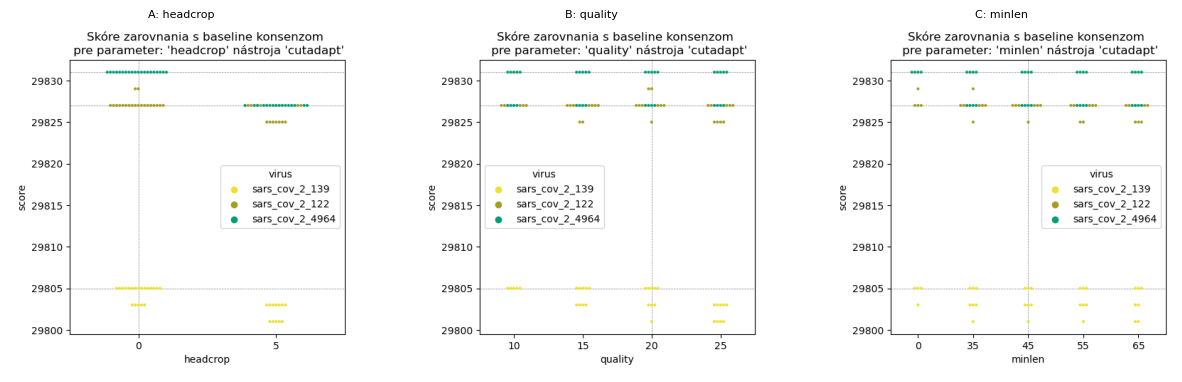

In [9]:
# Combine individual plots into one PNG file - with title - Horizontaly
for alignment_score in [alignment_scores[1]]:

    path_to_save_fig1 = "./data/result_metrics/comparison_MBS_params_score/" + alignment_score + "/"
    path_to_save_fig2 = '_' + alignment_score + '_' + analyse_minlen0_path + date_generated + get_sars_plots_path(True) + trimmer
    param_label_abc = {'headcrop': 'A: headcrop', 'quality': 'B: quality', 'minlen': 'C: minlen'}


    images = [f'{path_to_save_fig1}{param_used}{path_to_save_fig2}.png' for param_used in param_used_values]
    combined_fig, axes = plt.subplots(1, len(images), figsize=(15, 5))

    for i, (image, param_label) in enumerate(zip(images, param_used_values), 1):
        img = plt.imread(image)
        axes[i - 1].imshow(img)
        axes[i - 1].axis('off')
        axes[i - 1].set_title(param_label_abc[param_label], fontsize=8)

    path_to_save_fig1 = "./data/result_metrics/comparison_MBS_params_score/finalne_porovnania/"
    # Save the combined figure to a PNG file
    combined_fig.savefig(path_to_save_fig1 + 'combined_plots' + path_to_save_fig2 + '.png', bbox_inches='tight', dpi=500)

    plt.show()


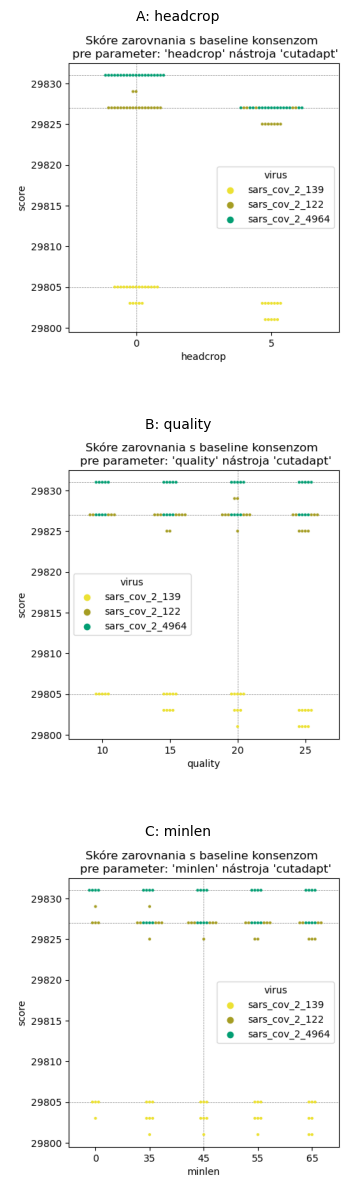

In [11]:
# Combine individual plots into one PNG file with title - Verticaly
for alignment_score in [alignment_scores[1]]:

    if not analyse_minlen0:
        analyse_minlen0_path = 'nominlen0_'
    else:
        analyse_minlen0_path = ''

    path_to_save_fig1 = "./data/result_metrics/comparison_MBS_params_score/" + alignment_score + "/"
    path_to_save_fig2 = '_' + alignment_score + '_' + analyse_minlen0_path + date_generated + get_sars_plots_path(True) + trimmer
    
    param_used_values = ['headcrop', 'quality', 'minlen']
    param_label_abc = {'headcrop': 'A: headcrop', 'quality': 'B: quality', 'minlen': 'C: minlen'}
    
    images = [f'{path_to_save_fig1}{param_used}{path_to_save_fig2}.png' for param_used in param_used_values]
    
    # if trimmer == '_cutadapt':
        # combined_fig, axes = plt.subplots(len(images), 1, figsize=(5, 18))
    # else:
    combined_fig, axes = plt.subplots(len(images), 1, figsize=(8, 15))


    for ax, image, param_label in zip(axes, images, param_used_values):
        img = plt.imread(image)
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(param_label_abc[param_label], fontsize=10)

    path_to_save_fig1 = "./data/result_metrics/comparison_MBS_params_score/finalne_porovnania/"
    # Save the combined figure to a PNG file
    combined_fig.savefig(path_to_save_fig1 + 'combined_plots' + path_to_save_fig2 + '_vr.png', bbox_inches='tight', dpi=500)

    plt.show()


#generovanie influenz a rsv (bez sars_cov_2)


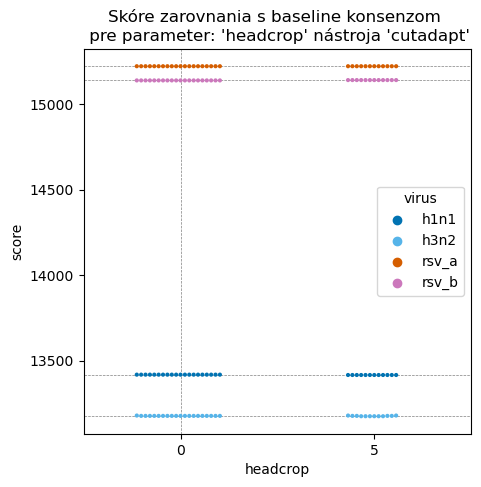

<Figure size 640x480 with 0 Axes>

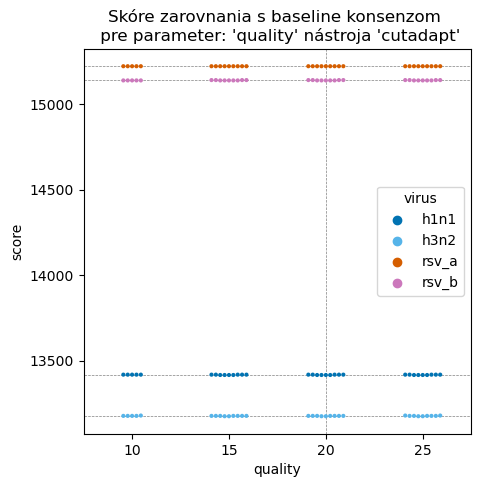

<Figure size 640x480 with 0 Axes>

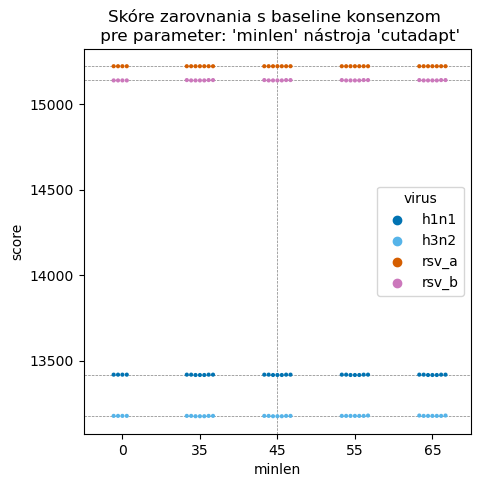

<Figure size 640x480 with 0 Axes>

In [3]:
# generovanie vsetkych influenza a rsv (bez sars_cov_2)

param_used_values = ['headcrop', 'quality', 'minlen']

for alignment_score in ['match1_mis-1_o-2_e-2']:

    path_to_rd_samples = './data/result_metrics/results_all_viruses/results_all_viruses_' + alignment_score + '_' + date_generated + trimmer + '.tsv'
    all_rd_samples = pd.read_csv(path_to_rd_samples, sep='\t')
    all_rd_samples = all_rd_samples[all_rd_samples.virus != 'sars_cov_2_139']
    all_rd_samples = all_rd_samples[all_rd_samples.virus != 'sars_cov_2_122']
    all_rd_samples = all_rd_samples[all_rd_samples.virus != 'sars_cov_2_4964']

    if not analyse_minlen0:
        all_rd_samples = all_rd_samples[all_rd_samples.minlen != 0]

    if trimmer == '_cutadapt':
        all_rd_samples = all_rd_samples[all_rd_samples.quality != 30]
        all_rd_samples = all_rd_samples[all_rd_samples.headcrop != 10]
    
    
    for param_used in param_used_values:
        
        if trimmer == '_cutadapt':
            plt.figure(figsize=(5,5))
        else:
            plt.figure(figsize=(8,8))
        
        # plot_title = 'Skóre zarovnania s baseline konsenzom pre parameter: '+ param_used + ' (' + trimmer.replace('_', '') + ')'
        plot_title = "Skóre zarovnania s baseline konsenzom \n pre parameter: '" + param_used + "' nástroja '" + trimmer.replace('_', '') + "'"
        sns.swarmplot(data=all_rd_samples, x=param_used, y="score", hue="virus", size=3, palette=virus_color_pallete)
        plt.axhline(y=all_rd_samples[all_rd_samples.consensus_baseline_virus == 'MBS_h1n1']['score'].item(), color='grey', linestyle='--', linewidth=0.5)
        plt.axhline(y=all_rd_samples[all_rd_samples.consensus_baseline_virus == 'MBS_h3n2']['score'].item(), color='grey', linestyle='--', linewidth=0.5)
        plt.axhline(y=all_rd_samples[all_rd_samples.consensus_baseline_virus == 'MBS_rsv_a']['score'].item(), color='grey', linestyle='--', linewidth=0.5)
        plt.axhline(y=all_rd_samples[all_rd_samples.consensus_baseline_virus == 'MBS_rsv_b']['score'].item(), color='grey', linestyle='--', linewidth=0.5)


        #  headcrop:: mbs_param = 0, else mbs_param = 2, ale pri minlen ak je aj minlen0, tak posun na 2
        if param_used == 'headcrop':
            mbs_param = 0
        
        elif param_used == 'minlen':
            if analyse_minlen0:
                mbs_param = 2
            else:
                mbs_param = 1
        else: # quality
            mbs_param = 2

        plt.axvline(x=mbs_param, color='grey', linestyle='--', linewidth=0.5)

        plt.title(plot_title, fontsize=12)

        path_to_save_fig = "./data/result_metrics/comparison_MBS_params_score/" + alignment_score + "/" + param_used + '_' + alignment_score + '_' + analyse_minlen0_path + date_generated + trimmer + ".png"

        # Save the figure for the current param_used
        plt.savefig(path_to_save_fig, bbox_inches='tight')

        plt.show()

        # Clear the current figure to start a new one
        plt.clf()



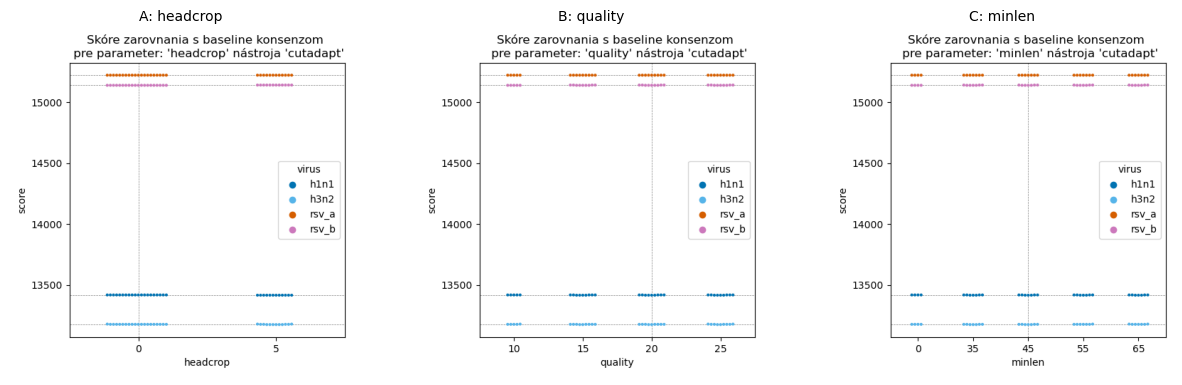

In [4]:
# Combine individual plots into one PNG file - with title - Horizontaly
for alignment_score in [alignment_scores[1]]:

    path_to_save_fig1 = "./data/result_metrics/comparison_MBS_params_score/" + alignment_score + "/"
    path_to_save_fig2 = '_' + alignment_score + '_' + analyse_minlen0_path + date_generated + trimmer
    param_label_abc = {'headcrop': 'A: headcrop', 'quality': 'B: quality', 'minlen': 'C: minlen'}


    images = [f'{path_to_save_fig1}{param_used}{path_to_save_fig2}.png' for param_used in param_used_values]
    combined_fig, axes = plt.subplots(1, len(images), figsize=(15, 5))

    for i, (image, param_label) in enumerate(zip(images, param_used_values), 1):
        img = plt.imread(image)
        axes[i - 1].imshow(img)
        axes[i - 1].axis('off')
        axes[i - 1].set_title(param_label_abc[param_label], fontsize=10)

    path_to_save_fig1 = "./data/result_metrics/comparison_MBS_params_score/finalne_porovnania/"
    # Save the combined figure to a PNG file
    combined_fig.savefig(path_to_save_fig1 + 'combined_plots' + path_to_save_fig2 + '.png', bbox_inches='tight', dpi=500)

    plt.show()


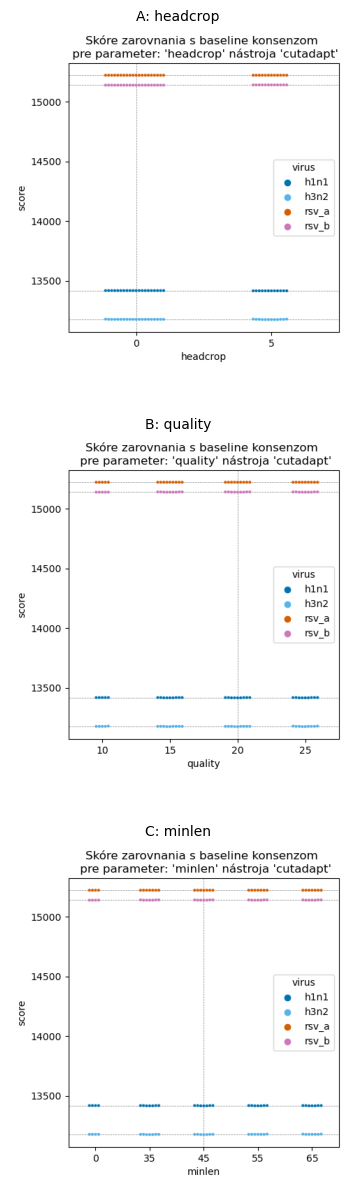

In [5]:
# Combine individual plots into one PNG file with title - Verticaly
for alignment_score in [alignment_scores[1]]:

    if not analyse_minlen0:
        analyse_minlen0_path = 'nominlen0_'
    else:
        analyse_minlen0_path = ''

    path_to_save_fig1 = "./data/result_metrics/comparison_MBS_params_score/" + alignment_score + "/"
    path_to_save_fig2 = '_' + alignment_score + '_' + analyse_minlen0_path + date_generated + trimmer
    param_used_values = ['headcrop', 'quality', 'minlen']
    param_label_abc = {'headcrop': 'A: headcrop', 'quality': 'B: quality', 'minlen': 'C: minlen'}
    
    images = [f'{path_to_save_fig1}{param_used}{path_to_save_fig2}.png' for param_used in param_used_values]
    combined_fig, axes = plt.subplots(len(images), 1, figsize=(8, 15))

    for ax, image, param_label in zip(axes, images, param_used_values):
        img = plt.imread(image)
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(param_label_abc[param_label], fontsize=10) # trimmomatic 8

    path_to_save_fig1 = "./data/result_metrics/comparison_MBS_params_score/finalne_porovnania/"
    # Save the combined figure to a PNG file
    combined_fig.savefig(path_to_save_fig1 + 'combined_plots' + path_to_save_fig2 + '_vr.png', bbox_inches='tight', dpi=500)

    plt.show()


In [4]:
samples_names = {'h1n1': 'run230320_UVZ_BA_23-vsp-1337_',
                 'h3n2': 'run230320_UVZ_BA_23-vsp-2129_',
                 'rsv_a': 'run230320_UVZ_BA_23-vsp-1658_',
                 'rsv_b': 'run230320_UVZ_BA_23-vsp-902_',
                 'sars_cov_2_122': 'uvzsr-BA_24_00001-G12-BA_24_00000122_',
                 'sars_cov_2_139': 'uvzsr-BA_24_00002-A09-BA_24_00000139_',
                 'sars_cov_2_4964': 'run230710_UVZ_BA_23-vsp-4964'
                 }
mbs_params = {'quality': 20,
              'minlen': 45,
              'headcrop': 0}
# ==> 'tripq20_headcrop0_minlen45'

param_names_trimmomatic = {
            'headcrop': [0, 5, 10, 15],
            'quality': [10, 15, 20, 25],
            'minlen': [35, 45, 55, 65],
            }

param_names_cutadapt = {
            'headcrop': [0, 5],
            'quality': [10, 15, 20, 25],
            'minlen': [35, 45, 55, 65],
            }

if analyse_minlen0:
    param_names_cutadapt['minlen'].insert(0, 0)
    param_names_trimmomatic['minlen'].insert(0, 0)

param_used_values = ['headcrop', 'quality', 'minlen']
param_label_abc = {'headcrop': 'A: headcrop', 'quality': 'B: quality', 'minlen': 'C: minlen'}



if trimmer == '_cutadapt':
    param_names = param_names_cutadapt
elif trimmer == '_trimmomatic':
    param_names = param_names_trimmomatic
else:
    print('Vyber trimmer, ktory bol pouzity')
print(param_names)


if not analyse_minlen0:
    analyse_minlen0_path = 'nominlen0_'
else:
    analyse_minlen0_path = ''


{'headcrop': [0, 5, 10, 15], 'quality': [10, 15, 20, 25], 'minlen': [0, 35, 45, 55, 65]}


# Porovnania skore zarovnani pri zmene jedneho parametra so skore zarovania pri pouziti mbs nastavenia pre dany virus

param_to_filter: quality 20
param_to_filter: minlen 45
h1n1
param_col:  headcrop param: 0
headcrop :  0 =   13418.0 / 13418.0  =  1.0  ==>  0.0
param_col:  headcrop param: 5
headcrop :  5 =   13416.0 / 13418.0  =  0.9998509464897898  ==>  -0.014905351021021751
h3n2
param_col:  headcrop param: 0
headcrop :  0 =   13177.0 / 13177.0  =  1.0  ==>  0.0
param_col:  headcrop param: 5
headcrop :  5 =   13175.0 / 13177.0  =  0.9998482203840025  ==>  -0.01517796159975493
rsv_a
param_col:  headcrop param: 0
headcrop :  0 =   15221.0 / 15221.0  =  1.0  ==>  0.0
param_col:  headcrop param: 5
headcrop :  5 =   15221.0 / 15221.0  =  1.0  ==>  0.0
rsv_b
param_col:  headcrop param: 0
headcrop :  0 =   15138.0 / 15138.0  =  1.0  ==>  0.0
param_col:  headcrop param: 5
headcrop :  5 =   15140.0 / 15138.0  =  1.0001321178491214  ==>  0.013211784912137148
sars_cov_2_122
param_col:  headcrop param: 0
headcrop :  0 =   29827.0 / 29827.0  =  1.0  ==>  0.0
param_col:  headcrop param: 5
headcrop :  5 =   29827.0

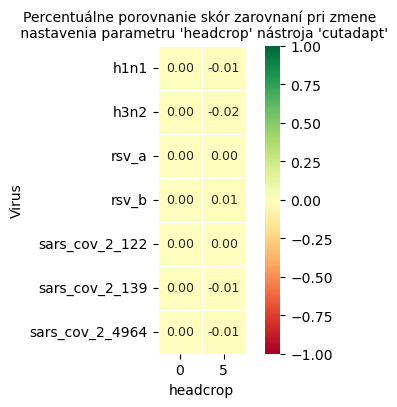

param_to_filter: minlen 45
param_to_filter: headcrop 0
h1n1
param_col:  quality param: 10
quality :  10 =   13418.0 / 13418.0  =  1.0  ==>  0.0
param_col:  quality param: 15
quality :  15 =   13418.0 / 13418.0  =  1.0  ==>  0.0
param_col:  quality param: 20
quality :  20 =   13418.0 / 13418.0  =  1.0  ==>  0.0
param_col:  quality param: 25
quality :  25 =   13418.0 / 13418.0  =  1.0  ==>  0.0
h3n2
param_col:  quality param: 10
quality :  10 =   13177.0 / 13177.0  =  1.0  ==>  0.0
param_col:  quality param: 15
quality :  15 =   13177.0 / 13177.0  =  1.0  ==>  0.0
param_col:  quality param: 20
quality :  20 =   13177.0 / 13177.0  =  1.0  ==>  0.0
param_col:  quality param: 25
quality :  25 =   13177.0 / 13177.0  =  1.0  ==>  0.0
rsv_a
param_col:  quality param: 10
quality :  10 =   15221.0 / 15221.0  =  1.0  ==>  0.0
param_col:  quality param: 15
quality :  15 =   15221.0 / 15221.0  =  1.0  ==>  0.0
param_col:  quality param: 20
quality :  20 =   15221.0 / 15221.0  =  1.0  ==>  0.0
param

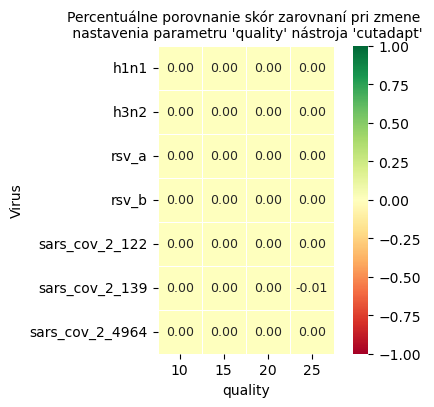

param_to_filter: quality 20
param_to_filter: headcrop 0
h1n1
param_col:  minlen param: 0
minlen :  0 =   13418.0 / 13418.0  =  1.0  ==>  0.0
param_col:  minlen param: 35
minlen :  35 =   13418.0 / 13418.0  =  1.0  ==>  0.0
param_col:  minlen param: 45
minlen :  45 =   13418.0 / 13418.0  =  1.0  ==>  0.0
param_col:  minlen param: 55
minlen :  55 =   13418.0 / 13418.0  =  1.0  ==>  0.0
param_col:  minlen param: 65
minlen :  65 =   13418.0 / 13418.0  =  1.0  ==>  0.0
h3n2
param_col:  minlen param: 0
minlen :  0 =   13177.0 / 13177.0  =  1.0  ==>  0.0
param_col:  minlen param: 35
minlen :  35 =   13177.0 / 13177.0  =  1.0  ==>  0.0
param_col:  minlen param: 45
minlen :  45 =   13177.0 / 13177.0  =  1.0  ==>  0.0
param_col:  minlen param: 55
minlen :  55 =   13177.0 / 13177.0  =  1.0  ==>  0.0
param_col:  minlen param: 65
minlen :  65 =   13177.0 / 13177.0  =  1.0  ==>  0.0
rsv_a
param_col:  minlen param: 0
minlen :  0 =   15221.0 / 15221.0  =  1.0  ==>  0.0
param_col:  minlen param: 35
min

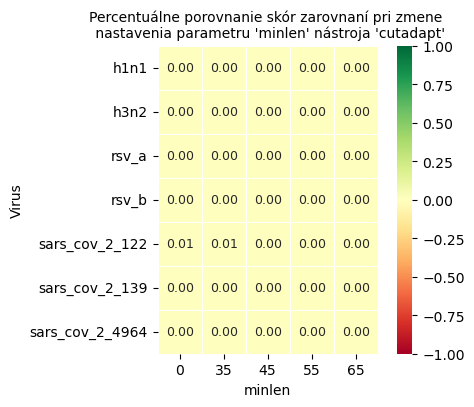

<Figure size 640x480 with 0 Axes>

In [8]:
# pre vsetky skorovacie schemy
for alignment_score in ['match1_mis-1_o-2_e-2']: #alignment_scores: 

    path_to_rd_samples = './data/result_metrics/results_all_viruses/results_all_viruses_' + alignment_score + '_' + date_generated + trimmer + '.tsv'
    all_rd_samples = pd.read_csv(path_to_rd_samples, sep='\t')
    
    all_rd_samples = all_rd_samples[all_rd_samples.quality != 30]
    
    if not analyse_minlen0:
        all_rd_samples = all_rd_samples[all_rd_samples.minlen != 0]

    # ake parametre, ktorych hodnoty sa menili
    for param_col in param_names.keys():
        
        params = param_names[param_col]

        rd_samples_param_comparison = pd.DataFrame(columns=params)

        # Remove param_col (napr 'headcrop') key from mbs_params
        mbs_params_filtered = {key: value for key, value in mbs_params.items() if key != param_col}

        filtered_df = all_rd_samples
        # get df s param_col, ktory sa meni, ale ostatne parametre zostavaju s mbs nastavenim
        for param_to_filter in mbs_params_filtered.keys():
            print('param_to_filter:' , param_to_filter, mbs_params_filtered[param_to_filter])
            filtered_df = filtered_df[(filtered_df[param_to_filter] == mbs_params_filtered[param_to_filter])]

        # pre vsetky virusy
        for virus_x in samples_names.keys():
            print(virus_x)

            # prazdny df (vyplneny '0')
            virus_param_comparison = pd.DataFrame([[0] * len(params)], columns=params)
            
            virus_df =  filtered_df[filtered_df.virus == virus_x]

            for param in params:
                print('param_col: ', param_col, 'param:', param)

                mbs_value = all_rd_samples[(all_rd_samples.virus == virus_x) & (all_rd_samples.consensus_baseline == 'MBS')].score.item()
                
                # if param_num is the same as value of mbs_param_col
                if mbs_params[param_col] == param:
                    param_value = mbs_value
                else:
                    if not virus_df[virus_df[param_col] == param].shape[0] == 0:
                        param_value = virus_df[virus_df[param_col] == param].score.item()
                    else:
                        param_value = np.nan
                
                score_diff = param_value / mbs_value
                score_diff_perc = (score_diff - 1 ) * 100 # o ake percento sa hodnota zvysila/znizila
                virus_param_comparison[param] = score_diff_perc

                print(param_col, ': ', param, '=  ', param_value, '/', mbs_value, ' = ', score_diff, ' ==> ', score_diff_perc)
                
            virus_param_comparison['virus'] = virus_x

            rd_samples_param_comparison = pd.concat([rd_samples_param_comparison, virus_param_comparison], ignore_index=True)

                            
        # plt.figure(figsize=(6,3))

        plt.clf()
        # Replace NaN with a specific value (e.g., -1)
        rd_samples_param_comparison.fillna(-200, inplace=True)
        rd_samples_param_comparison.set_index('virus', inplace=True)
        # Masking the -1 values
        mask = rd_samples_param_comparison == -200
        ax = sns.heatmap(rd_samples_param_comparison, annot=True, cmap='RdYlGn', linewidths=.5, mask=mask, vmin=-1, vmax=1, square=True, annot_kws={"size": 9}, fmt=".2f")
        # ax = sns.heatmap(rd_samples_param_median_diff.set_index('virus'), cmap="Blues", annot=True, annot_kws={"size": 9}, fmt=".4f")

        ax.set(xlabel=param_col, ylabel="Virus")

        # plot_title = "Percentuálne porovnanie skór zarovnaní pre parameter '" + param_col + "' " + '\n so skóre pri nastavení parametrov na baseline hodnoty' + '\n' +  alignment_score + '  (' + trimmer.replace('_', '') + ')'
        plot_title = "Percentuálne porovnanie skór zarovnaní pri zmene \n nastavenia parametru '" + param_col + "' nástroja '" + trimmer.replace('_', '') + "'"
        plt.title(plot_title, fontsize=10)
        plt.gcf().set_size_inches(5, 4)

        path_to_save_fig = './data/result_metrics/comparison_MBS_params_score/finalne_porovnania/heatmap_' + param_col + '_' + alignment_score + '_' + analyse_minlen0_path + date_generated + trimmer + "_noq30.png"
        plt.savefig(path_to_save_fig, bbox_inches='tight')
        print(path_to_save_fig)
        plt.show()

        plt.clf()



['./data/result_metrics/comparison_MBS_params_score/finalne_porovnania/heatmap_headcrop_match1_mis-1_o-2_e-2_2024_4_23_cutadapt_noq30.png', './data/result_metrics/comparison_MBS_params_score/finalne_porovnania/heatmap_quality_match1_mis-1_o-2_e-2_2024_4_23_cutadapt_noq30.png', './data/result_metrics/comparison_MBS_params_score/finalne_porovnania/heatmap_minlen_match1_mis-1_o-2_e-2_2024_4_23_cutadapt_noq30.png']


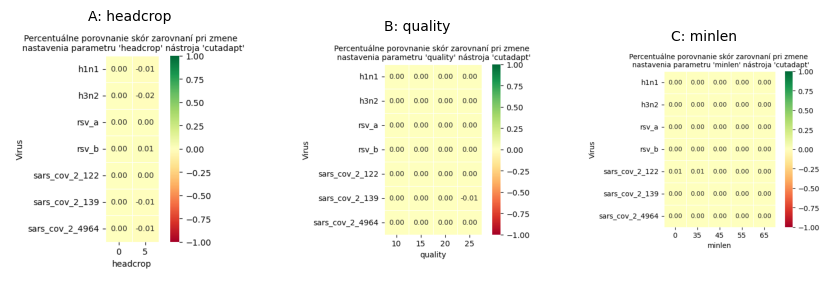

In [9]:
# Combine individual plots into one PNG file - with title

for alignment_score in ['match1_mis-1_o-2_e-2']:  # alignment_scores
    
    path_to_save_fig1 = './data/result_metrics/comparison_MBS_params_score/finalne_porovnania/'
    path_to_save_fig12 = 'heatmap_'
    path_to_save_fig2 = '_' + alignment_score + '_' + analyse_minlen0_path + date_generated + trimmer + '_noq30'

    images = [f'{path_to_save_fig1}{path_to_save_fig12}{param_col}{path_to_save_fig2}.png' for param_col in list(param_names.keys())]
    
    print(images)
    combined_fig, axes = plt.subplots(1, len(images), figsize=(10.5, 5))

    for i, (image, param_label) in enumerate(zip(images, list(param_names.keys())), 1):
        img = plt.imread(image)
        axes[i - 1].imshow(img)
        axes[i - 1].axis('off')
        axes[i - 1].set_title(param_label_abc[param_label], fontsize=10)

    # Save the combined figure to a PNG file
    combined_fig.savefig(path_to_save_fig1 + 'combined_plots_heatmap_' + path_to_save_fig2 + '.png', bbox_inches='tight', dpi = 500)

    plt.show()


In [138]:
all_rd_samples[(all_rd_samples.virus == 'sars_cov_2_122') & (all_rd_samples.quality == mbs_params['quality']) & 
               (all_rd_samples.headcrop == mbs_params['headcrop'])]
params

[35, 45, 55, 65, 0]

In [ ]:
# heatplots
# med(H1, Q=30)/med(H1, Q=baseline=15)

# med(aligment_score_MBS)

0 :   13418.0 / 13418.0  =  1.0  ==>  0.0
5 :   13416.0 / 13418.0  =  0.9998509464897898  ==>  -0.014905351021021751
0 :   13177.0 / 13177.0  =  1.0  ==>  0.0
5 :   13176.0 / 13177.0  =  0.9999241101920012  ==>  -0.007588980799877465
0 :   15221.0 / 15221.0  =  1.0  ==>  0.0
5 :   15221.0 / 15221.0  =  1.0  ==>  0.0
0 :   15138.0 / 15138.0  =  1.0  ==>  0.0
5 :   15140.0 / 15138.0  =  1.0001321178491214  ==>  0.013211784912137148
0 :   29827.0 / 29827.0  =  1.0  ==>  0.0
5 :   29825.0 / 29827.0  =  0.9999329466590673  ==>  -0.006705334093271009
0 :   29805.0 / 29805.0  =  1.0  ==>  0.0
5 :   29803.0 / 29805.0  =  0.9999328971649052  ==>  -0.0067102835094812185
0 :   29831.0 / 29831.0  =  1.0  ==>  0.0
5 :   29827.0 / 29831.0  =  0.9998659113003252  ==>  -0.013408869967479475
./data/result_metrics/comparison_MBS_params_score/finalne_porovnania/heatmap_headcrop_match1_mis-1_o-2_e-2_2024_4_10_cutadapt.png


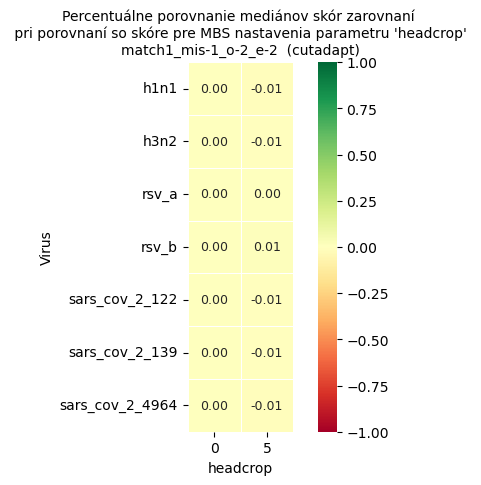

10 :   13418.0 / 13418.0  =  1.0  ==>  0.0
15 :   13418.0 / 13418.0  =  1.0  ==>  0.0
20 :   13418.0 / 13418.0  =  1.0  ==>  0.0
25 :   13418.0 / 13418.0  =  1.0  ==>  0.0
10 :   13177.0 / 13177.0  =  1.0  ==>  0.0
15 :   13177.0 / 13177.0  =  1.0  ==>  0.0
20 :   13177.0 / 13177.0  =  1.0  ==>  0.0
25 :   13177.0 / 13177.0  =  1.0  ==>  0.0
10 :   15221.0 / 15221.0  =  1.0  ==>  0.0
15 :   15221.0 / 15221.0  =  1.0  ==>  0.0
20 :   15221.0 / 15221.0  =  1.0  ==>  0.0
25 :   15221.0 / 15221.0  =  1.0  ==>  0.0
10 :   15138.0 / 15138.0  =  1.0  ==>  0.0
15 :   15138.0 / 15138.0  =  1.0  ==>  0.0
20 :   15138.0 / 15138.0  =  1.0  ==>  0.0
25 :   15138.0 / 15138.0  =  1.0  ==>  0.0
10 :   29827.0 / 29827.0  =  1.0  ==>  0.0
15 :   29827.0 / 29827.0  =  1.0  ==>  0.0
20 :   29827.0 / 29827.0  =  1.0  ==>  0.0
25 :   29827.0 / 29827.0  =  1.0  ==>  0.0
10 :   29805.0 / 29805.0  =  1.0  ==>  0.0
15 :   29805.0 / 29805.0  =  1.0  ==>  0.0
20 :   29805.0 / 29805.0  =  1.0  ==>  0.0
25 :   2980

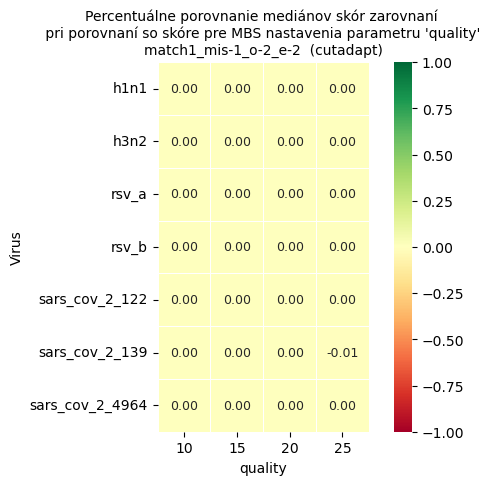

35 :   13418.0 / 13418.0  =  1.0  ==>  0.0
45 :   13418.0 / 13418.0  =  1.0  ==>  0.0
55 :   13418.0 / 13418.0  =  1.0  ==>  0.0
65 :   13418.0 / 13418.0  =  1.0  ==>  0.0
0 :   13418.0 / 13418.0  =  1.0  ==>  0.0
35 :   13177.0 / 13177.0  =  1.0  ==>  0.0
45 :   13177.0 / 13177.0  =  1.0  ==>  0.0
55 :   13177.0 / 13177.0  =  1.0  ==>  0.0
65 :   13177.0 / 13177.0  =  1.0  ==>  0.0
0 :   13177.0 / 13177.0  =  1.0  ==>  0.0
35 :   15221.0 / 15221.0  =  1.0  ==>  0.0
45 :   15221.0 / 15221.0  =  1.0  ==>  0.0
55 :   15221.0 / 15221.0  =  1.0  ==>  0.0
65 :   15221.0 / 15221.0  =  1.0  ==>  0.0
0 :   15221.0 / 15221.0  =  1.0  ==>  0.0
35 :   15138.0 / 15138.0  =  1.0  ==>  0.0
45 :   15138.0 / 15138.0  =  1.0  ==>  0.0
55 :   15138.0 / 15138.0  =  1.0  ==>  0.0
65 :   15138.0 / 15138.0  =  1.0  ==>  0.0
0 :   15138.0 / 15138.0  =  1.0  ==>  0.0
35 :   29827.0 / 29827.0  =  1.0  ==>  0.0
45 :   29827.0 / 29827.0  =  1.0  ==>  0.0
55 :   29827.0 / 29827.0  =  1.0  ==>  0.0
65 :   29827.0 

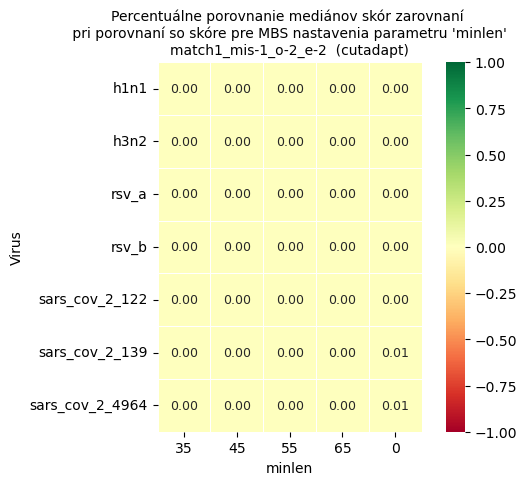

<Figure size 640x480 with 0 Axes>

In [29]:
# pre vsetky skorovacie schemy
for alignment_score in ['match1_mis-1_o-2_e-2']: #alignment_scores: 

    path_to_rd_samples = './data/result_metrics/results_all_viruses/results_all_viruses_' + alignment_score + '_' + date_generated + trimmer + '.tsv'
    all_rd_samples = pd.read_csv(path_to_rd_samples, sep='\t')
    
    all_rd_samples = all_rd_samples[all_rd_samples.quality != 30]
    
    if not analyse_minlen0:
        all_rd_samples = all_rd_samples[all_rd_samples.minlen != 0]

    # ake parametre, ktorych hodnoty sa menili
    for param_col in param_names.keys():
        
        # print(param_col)

        params = param_names[param_col]

        rd_samples_param_median = pd.DataFrame(columns=params)

        # pre vsetky virusy
        for virus_x in samples_names.keys():

            # prazdny df (vyplneny '0')
            virus_param_median = pd.DataFrame([[0] * len(params)], columns=params)
            virus_df =  all_rd_samples[all_rd_samples.virus == virus_x]

            for param in params:
                
                param_med = virus_df[virus_df[param_col] == param].score.median()
                virus_param_median[param] = param_med

            virus_param_median['virus'] = virus_x

            rd_samples_param_median = pd.concat([rd_samples_param_median, virus_param_median], ignore_index=True)

        # print(rd_samples_param_median)

        mbs_param = mbs_params[param_col]
        rd_samples_param_median_diff = pd.DataFrame(columns=params)
        virus_param_median_diff  = pd.DataFrame([[0] * len(params)], columns=params)

        for i, row in rd_samples_param_median.iterrows():
            
            virus_param_median_diff['virus'] = row['virus']
                
            for param in params:
                
                # vz_med = row[param]/row[mbs_param]
                # virus_param_median_diff[param] = vz_med

                vz_med = row[param]/row[mbs_param]
                vz_med_perc = (vz_med - 1) * 100 # o ake percento sa hodnota zvysila/znizila
                virus_param_median_diff[param] = vz_med_perc
                print(param, ':  ', row[param], '/', row[mbs_param], ' = ', vz_med, ' ==> ', vz_med_perc)
                
            
            rd_samples_param_median_diff = pd.concat([rd_samples_param_median_diff, virus_param_median_diff], ignore_index=True)
                
        # print(rd_samples_param_median_diff)
        # plt.figure(figsize=(6,3))

        plt.clf()
        # Replace NaN with a specific value (e.g., -1)
        rd_samples_param_median_diff.fillna(-200, inplace=True)
        rd_samples_param_median_diff.set_index('virus', inplace=True)
        # Masking the -1 values
        mask = rd_samples_param_median_diff == -200
        ax = sns.heatmap(rd_samples_param_median_diff, annot=True, cmap='RdYlGn', linewidths=.5, mask=mask, vmin=-1, vmax=1, square=True, annot_kws={"size": 9}, fmt=".2f")
        # ax = sns.heatmap(rd_samples_param_median_diff.set_index('virus'), cmap="Blues", annot=True, annot_kws={"size": 9}, fmt=".4f")

        ax.set(xlabel=param_col, ylabel="Virus")

        # plot_title = 'Comparison of median of values for used parameter \n to median of scores of parameter for MBS '+ param_col + ' ' + '\n' + alignment_score + trimmer
        # plot_title = 'Porovnanie skore zarovania s MBS skore pre '+ param_col + ' ' + '\n' + alignment_score + trimmer
        plot_title = "Percentuálne porovnanie mediánov skór zarovnaní \n pri porovnaní so skóre pre MBS nastavenia parametru '" + param_col + "' " + '\n' +  alignment_score + '  (' + trimmer.replace('_', '') + ')'
        plt.title(plot_title, fontsize=10)
        # plt.gcf().set_size_inches(6, 3.5)

        path_to_save_fig = './data/result_metrics/comparison_MBS_params_score/finalne_porovnania/heatmap_' + param_col + '_' + alignment_score + '_' + analyse_minlen0_path + date_generated + trimmer + ".png"
        plt.savefig(path_to_save_fig, bbox_inches='tight')
        print(path_to_save_fig)
        plt.show()

        plt.clf()



['./data/result_metrics/comparison_MBS_params_score/finalne_porovnania/heatmap_headcrop_match1_mis-1_o-2_e-2_2024_4_10_cutadapt.png', './data/result_metrics/comparison_MBS_params_score/finalne_porovnania/heatmap_quality_match1_mis-1_o-2_e-2_2024_4_10_cutadapt.png', './data/result_metrics/comparison_MBS_params_score/finalne_porovnania/heatmap_minlen_match1_mis-1_o-2_e-2_2024_4_10_cutadapt.png']


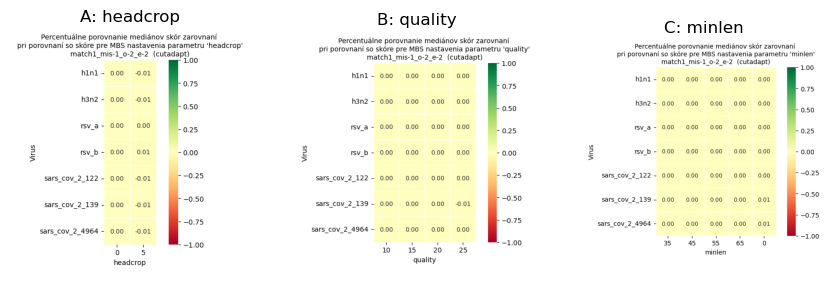

In [30]:
# Combine individual plots into one PNG file - with title

for alignment_score in ['match1_mis-1_o-2_e-2']:  # alignment_scores
    
    path_to_save_fig1 = './data/result_metrics/comparison_MBS_params_score/finalne_porovnania/'
    path_to_save_fig12 = 'heatmap_'
    path_to_save_fig2 = '_' + alignment_score + '_' + analyse_minlen0_path + date_generated + trimmer

    images = [f'{path_to_save_fig1}{path_to_save_fig12}{param_col}{path_to_save_fig2}.png' for param_col in list(param_names.keys())]
    
    print(images)
    combined_fig, axes = plt.subplots(1, len(images), figsize=(10.5, 5))

    for i, (image, param_label) in enumerate(zip(images, list(param_names.keys())), 1):
        img = plt.imread(image)
        axes[i - 1].imshow(img)
        axes[i - 1].axis('off')
        axes[i - 1].set_title(param_label_abc[param_label])

    # Save the combined figure to a PNG file
    combined_fig.savefig(path_to_save_fig1 + 'combined_plots_heatmap_' + path_to_save_fig2 + '.png', bbox_inches='tight', dpi = 500)

    plt.show()


#get parameter set for each virus where is there is the highest score  


In [52]:
# get parameter set for each virus where is there is the highest score  

for alignment_score in [alignment_scores[1]]: #['match1_mis-1_o-2_e-2']: 
    
    print(alignment_score)

    scores_df = pd.read_csv('./data/result_metrics/results_all_viruses/results_all_viruses_' + alignment_score + '_' + date_generated + trimmer + '.tsv', sep='\t')
    score_max_df = pd.DataFrame(columns = scores_df.columns.to_list())

    for virus in samples_names.keys():
        scores_df_virus = scores_df[scores_df.virus == virus]

        if not scores_df_virus.empty:
            score_max = max(scores_df_virus.score.to_list())

            print(virus, score_max)
            scores_df_virus = scores_df_virus[scores_df_virus.score == score_max]

            score_max_df = pd.concat([score_max_df, scores_df_virus])

score_max_df

path_to_save_score_max_df = './data/result_metrics/results_all_viruses/results_all_viruses_' + alignment_score + '_' + date_generated + trimmer + '_maxScores.tsv'
score_max_df.to_csv(path_to_save_score_max_df, sep='\t', index=False)


match1_mis-1_o-2_e-2
h1n1 13418.0
h3n2 13179.0
rsv_a 15221.0
rsv_b 15140.0
sars_cov_2_122 29829.0
sars_cov_2_139 29805.0
sars_cov_2_4964 29831.0


#oznac kombinaciu parametrov pre virus, pri ktorej je dosiahnute maximalne skore

In [53]:
alignment_score = alignment_scores[1]

path_to_score_max_df = './data/result_metrics/results_all_viruses/results_all_viruses_' + alignment_score + '_' + date_generated + trimmer + '_maxScores.tsv'
score_max_df = pd.read_csv(path_to_score_max_df, sep='\t')
score_max_df

# Create a MultiIndex for columns
columns = pd.MultiIndex.from_tuples([('virus', 'virus'),
                                     ('headcrop', 0),('headcrop', 5),('headcrop', 10),('headcrop', 15), 
                                    ('quality', 10), ('quality', 15), ('quality', 20), ('quality', 25), ('quality', 30), 
                                    ('minlen', 0), ('minlen', 0), ('minlen', 35), ('minlen', 45), ('minlen', 55), ('minlen', 65),
                                    ('score', 'score')
                                    ])
                                     
# Create a DataFrame with the MultiIndex columns
df = pd.DataFrame( columns=columns)

row_i = 0

for i, row in score_max_df.iterrows():

    virus_name = row['virus']
    df.loc[row_i, ('virus', 'virus')] = virus_name

    df.loc[row_i, ('headcrop', row['headcrop'])] = 'x'
    df.loc[row_i, ('quality', row['quality'])] = 'x'
    df.loc[row_i, ('minlen', row['minlen'])] = 'x'
    df.loc[row_i, ('score', 'score')] = row['score']

    row_i += 1


path_to_save_score_max_df = './data/result_metrics/results_all_viruses/results_all_viruses_' + alignment_score + '_' + date_generated + trimmer + '_maxScores_x.tsv'
df.to_csv(path_to_save_score_max_df, sep='\t', index=False)
df


/tmp/ipykernel_291040/1780127482.py:23: PerformanceWarning: indexing past lexsort depth may impact performance.
  df.loc[row_i, ('virus', 'virus')] = virus_name
/tmp/ipykernel_291040/1780127482.py:25: PerformanceWarning: indexing past lexsort depth may impact performance.
  df.loc[row_i, ('headcrop', row['headcrop'])] = 'x'
/tmp/ipykernel_291040/1780127482.py:26: PerformanceWarning: indexing past lexsort depth may impact performance.
  df.loc[row_i, ('quality', row['quality'])] = 'x'
/tmp/ipykernel_291040/1780127482.py:27: PerformanceWarning: indexing past lexsort depth may impact performance.
  df.loc[row_i, ('minlen', row['minlen'])] = 'x'
/tmp/ipykernel_291040/1780127482.py:28: PerformanceWarning: indexing past lexsort depth may impact performance.
  df.loc[row_i, ('score', 'score')] = row['score']
/tmp/ipykernel_291040/1780127482.py:23: PerformanceWarning: indexing past lexsort depth may impact performance.
  df.loc[row_i, ('virus', 'virus')] = virus_name
/tmp/ipykernel_291040/1780

virus headcrop                quality                      \
               virus        0    5   10   15      10   15   20   25   30   
0               h1n1        x  NaN  NaN  NaN       x  NaN  NaN  NaN  NaN   
1               h1n1        x  NaN  NaN  NaN       x  NaN  NaN  NaN  NaN   
2               h1n1        x  NaN  NaN  NaN     NaN    x  NaN  NaN  NaN   
3               h1n1        x  NaN  NaN  NaN       x  NaN  NaN  NaN  NaN   
4               h1n1        x  NaN  NaN  NaN       x  NaN  NaN  NaN  NaN   
..               ...      ...  ...  ...  ...     ...  ...  ...  ...  ...   
101  sars_cov_2_4964        x  NaN  NaN  NaN     NaN  NaN    x  NaN  NaN   
102  sars_cov_2_4964        x  NaN  NaN  NaN     NaN    x  NaN  NaN  NaN   
103  sars_cov_2_4964        x  NaN  NaN  NaN     NaN    x  NaN  NaN  NaN   
104  sars_cov_2_4964        x  NaN  NaN  NaN     NaN  NaN    x  NaN  NaN   
105  sars_cov_2_4964        x  NaN  NaN  NaN       x  NaN  NaN  NaN  NaN   

    minlen                             score  
         0    0   35   45   55   65    score  
0      NaN  NaN  NaN  NaN    x  NaN  13418.0  
1      NaN  NaN  NaN  NaN  NaN    x  13418.0  
2      NaN  NaN  NaN    x  NaN  NaN  13418.0  
3        x    x  NaN  NaN  NaN  NaN  13418.0  
4      NaN  NaN  NaN    x  NaN  NaN  13418.0  
..     ...  ...  ...  ...  ...  ...      ...  
101      x    x  NaN  NaN  NaN  NaN  29831.0  
102    NaN  NaN  NaN  NaN    x  NaN  29831.0  
103    NaN  NaN  NaN    x  NaN  NaN  29831.0  
104    NaN  NaN  NaN  NaN    x  NaN  29831.0  
105    NaN  NaN  NaN    x  NaN  NaN  29831.0  

[106 rows x 17 columns]

In [54]:
# Exclude the column you don't want to consider
excluded_column = ['virus', 'score']
filtered_df = df.drop(excluded_column, axis=1)

# Find the row(s) that are most frequently presented
# most_frequent_rows = filtered_df.apply(tuple, axis=1).value_counts()#.idxmax()
filtered_df.apply(tuple, axis=1).value_counts()

(x, nan, nan, nan, nan, nan, x, nan, nan, x, x, nan, nan, nan, nan)      5
(x, nan, nan, nan, x, nan, nan, nan, nan, nan, nan, nan, nan, nan, x)    5
(x, nan, nan, nan, nan, nan, x, nan, nan, nan, nan, x, nan, nan, nan)    5
(x, nan, nan, nan, x, nan, nan, nan, nan, nan, nan, nan, nan, x, nan)    4
(x, nan, nan, nan, nan, x, nan, nan, nan, nan, nan, nan, nan, nan, x)    4
(x, nan, nan, nan, nan, x, nan, nan, nan, nan, nan, nan, nan, x, nan)    4
(x, nan, nan, nan, nan, nan, x, nan, nan, nan, nan, nan, nan, nan, x)    4
(x, nan, nan, nan, nan, x, nan, nan, nan, x, x, nan, nan, nan, nan)      4
(x, nan, nan, nan, nan, x, nan, nan, nan, nan, nan, x, nan, nan, nan)    4
(x, nan, nan, nan, nan, nan, x, nan, nan, nan, nan, nan, x, nan, nan)    4
(x, nan, nan, nan, x, nan, nan, nan, nan, nan, nan, x, nan, nan, nan)    4
(x, nan, nan, nan, nan, nan, x, nan, nan, nan, nan, nan, nan, x, nan)    4
(x, nan, nan, nan, x, nan, nan, nan, nan, nan, nan, nan, x, nan, nan)    4
(x, nan, nan, nan, nan, x

In [55]:

# df[df.drop(excluded_column, axis=1).apply(tuple, axis=1).isin(most_frequent_rows[most_frequent_rows == max_count].index)]
x = 'x'
nan = np.nan

if trimmer == '_trimmomatic':
    # trimmomatic
    most_frequent_rows = [ # first rows from with maximal count: filtered_df.apply(tuple, axis=1).value_counts()
    (x, nan, nan, nan, x, nan, nan, nan, nan, nan, nan, nan, nan, x, nan),    
    (x, nan, nan, nan, x, nan, nan, nan, nan, nan, nan, nan, nan, nan, x),   
    (x, nan, nan, nan, x, nan, nan, nan, nan, nan, nan, nan, x, nan, nan)
    ]

else: # cutadapt
    most_frequent_rows = [ # first rows from with maximal count: filtered_df.apply(tuple, axis=1).value_counts()
    (x, nan, nan, nan, nan, nan, x, nan, nan, x, x, nan, nan, nan, nan),
    (x, nan, nan, nan, x, nan, nan, nan, nan, nan, nan, nan, nan, nan, x),
    (x, nan, nan, nan, nan, nan, x, nan, nan, nan, nan, x, nan, nan, nan)
    ]


most_frequent_rows

for most_frequent_row in most_frequent_rows:

    # Filter the original DataFrame to get the rows
    result = df[df.drop(excluded_column, axis=1).apply(tuple, axis=1) == most_frequent_row]

    print("Most frequent row(s):")
    print(result)



Most frequent row(s):
               virus headcrop                quality                   minlen  \
               virus        0    5   10   15      10   15 20   25   30      0   
5               h1n1        x  NaN  NaN  NaN     NaN  NaN  x  NaN  NaN      x   
36             rsv_a        x  NaN  NaN  NaN     NaN  NaN  x  NaN  NaN      x   
70    sars_cov_2_122        x  NaN  NaN  NaN     NaN  NaN  x  NaN  NaN      x   
79    sars_cov_2_139        x  NaN  NaN  NaN     NaN  NaN  x  NaN  NaN      x   
101  sars_cov_2_4964        x  NaN  NaN  NaN     NaN  NaN  x  NaN  NaN      x   

                              score  
     0   35   45   55   65    score  
5    x  NaN  NaN  NaN  NaN  13418.0  
36   x  NaN  NaN  NaN  NaN  15221.0  
70   x  NaN  NaN  NaN  NaN  29829.0  
79   x  NaN  NaN  NaN  NaN  29805.0  
101  x  NaN  NaN  NaN  NaN  29831.0  
Most frequent row(s):
              virus headcrop                quality                      \
              virus        0    5   10   15    

In [ ]:
13418.0  
13179.0  
15221.0  
15138.0  
29827.0  
29805.0  
29843.0  

In [63]:
selected_max_param_from_median_comparison =  (x, nan, nan, nan, x,  nan, nan, nan, nan, x, x, nan, nan, nan, nan)
result = df[df.drop(excluded_column, axis=1).apply(tuple, axis=1) == selected_max_param_from_median_comparison]
result

virus headcrop                quality                      \
              virus        0    5   10   15      10   15   20   25   30   
3              h1n1        x  NaN  NaN  NaN       x  NaN  NaN  NaN  NaN   
24            rsv_a        x  NaN  NaN  NaN       x  NaN  NaN  NaN  NaN   
85   sars_cov_2_139        x  NaN  NaN  NaN       x  NaN  NaN  NaN  NaN   
88  sars_cov_2_4964        x  NaN  NaN  NaN       x  NaN  NaN  NaN  NaN   

   minlen                           score  
        0  0   35   45   55   65    score  
3       x  x  NaN  NaN  NaN  NaN  13418.0  
24      x  x  NaN  NaN  NaN  NaN  15221.0  
85      x  x  NaN  NaN  NaN  NaN  29805.0  
88      x  x  NaN  NaN  NaN  NaN  29831.0

In [46]:
trimmer

'_cutadapt'

In [43]:
# Function to find columns with 'x' value
def find_columns_with_x(df):
    columns_with_x = []
    for col in df.columns:
        if df[col].iloc[0] == 'x':
            columns_with_x.append(col)
    return columns_with_x

columns_with_x = find_columns_with_x(df)

# Extracting the virus name
virus_name = df['virus'].iloc[0]

print("Virus Name:", virus_name)
print("Columns with 'x' value:", columns_with_x)


/tmp/ipykernel_291040/1601680270.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  if df[col].iloc[0] == 'x':


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [45]:
df.columns

MultiIndex([(   'virus', 'virus'),
            ('headcrop',       0),
            ('headcrop',       5),
            ('headcrop',      10),
            ('headcrop',      15),
            ( 'quality',      10),
            ( 'quality',      15),
            ( 'quality',      20),
            ( 'quality',      25),
            ( 'quality',      30),
            (  'minlen',       0),
            (  'minlen',       0),
            (  'minlen',      35),
            (  'minlen',      45),
            (  'minlen',      55),
            (  'minlen',      65),
            (   'score', 'score')],
           )

# Heatmaps for tested parameters for variant caller tools

In [5]:
samples_names = {'h1n1': 'run230320_UVZ_BA_23-vsp-1337_',
                 'h3n2': 'run230320_UVZ_BA_23-vsp-2129_',
                 'rsv_a': 'run230320_UVZ_BA_23-vsp-1658_',
                 'rsv_b': 'run230320_UVZ_BA_23-vsp-902_',
                 'sars_cov_2_122': 'uvzsr-BA_24_00001-G12-BA_24_00000122_',
                 'sars_cov_2_139': 'uvzsr-BA_24_00002-A09-BA_24_00000139_',
                 'sars_cov_2_4964': 'run230710_UVZ_BA_23-vsp-4964'
                 }

tools_vc = ['bcftools', 'freebayes', 'ivar']

min_base_qualities = [0, 10, 13, 20]
min_map_qualities =  [0, 15, 30]
gap_fracs = [0.002, 0.05, 0.1]
redo_baqs = [0, 1]
adjust_mqs = [0, 25, 50]
ploidies = [1, 2]

params_variant_callers = {
   'freebayes': {'params_used': ['min_base_qualities', 'min_map_qualities', 'ploidies'], 
                 'min_base_qualities': min_base_qualities, 
                 'min_map_qualities': min_map_qualities, 
                 'ploidies': ploidies
                 },

    'bcftools': {'params_used': ['min_base_qualities', 'min_map_qualities', 'gap_fracs', 'redo_baqs', 'adjust_mqs', 'ploidies'],
                 'min_base_qualities': min_base_qualities, 
                 'min_map_qualities': min_map_qualities,
                 'gap_fracs': gap_fracs,
                 'redo_baqs': redo_baqs,
                 'adjust_mqs': adjust_mqs,
                 'ploidies': ploidies
                 },
    'ivar': {'params_used': ['min_base_qualities', 'min_map_qualities', 'redo_baqs'],
             'min_base_qualities': min_base_qualities, 
             'min_map_qualities': min_map_qualities,
             'redo_baqs': redo_baqs
             }
    }

param_abbr = {
    'min_base_qualities': 'minbq',
    'min_map_qualities': 'minmq',
    'gap_fracs': 'gap_frac',
    'redo_baqs': 'redo_baq',
    'adjust_mqs': 'adjust_mq',
    'redo_baqs': 'redo_baq',
    'ploidies': 'ploidy'
}


mbs_set_params_variant_callers = {
    'freebayes': {
        'min_base_qualities': 20,
        'min_map_qualities': 15,
        'ploidies': 2
    },
    'bcftools': {
        'min_base_qualities': 13,
        'min_map_qualities': 0,
        'gap_fracs': 0.05,
        'redo_baqs': 1,
        'adjust_mqs': 50,
        'ploidies': 2
    },
    'ivar': {
        'min_base_qualities': 13,
        'min_map_qualities': 15,
        'redo_baqs': 0 # no-BAQ = 1
        }
}




Variant_caller:  bcftools
min_base_qualities
Params:  [0, 10, 13, 20]


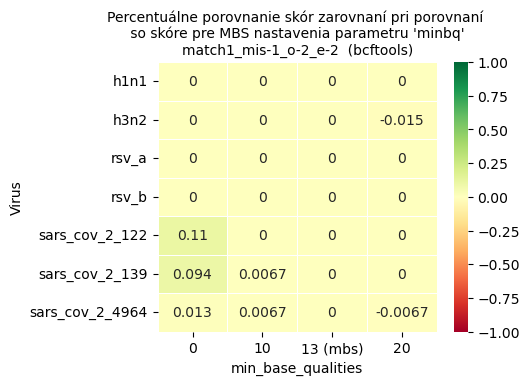

min_map_qualities
Params:  [0, 15, 30]


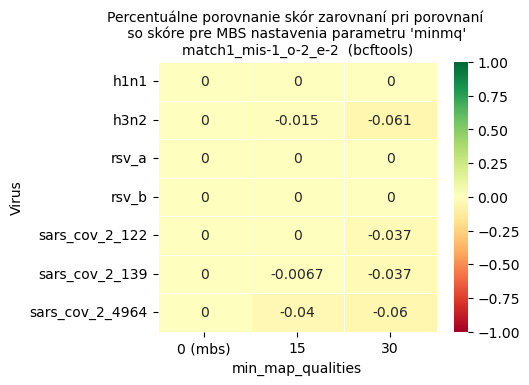

gap_fracs
Params:  [0.002, 0.05, 0.1]


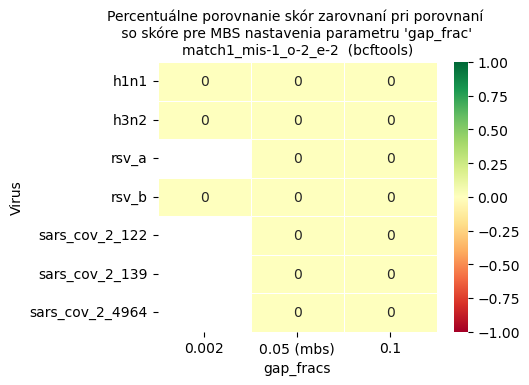

redo_baqs
Params:  [0, 1]


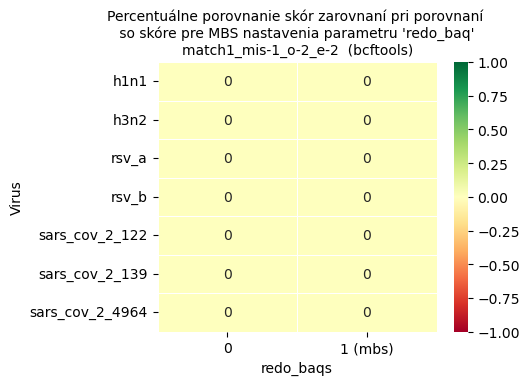

adjust_mqs
Params:  [0, 25, 50]


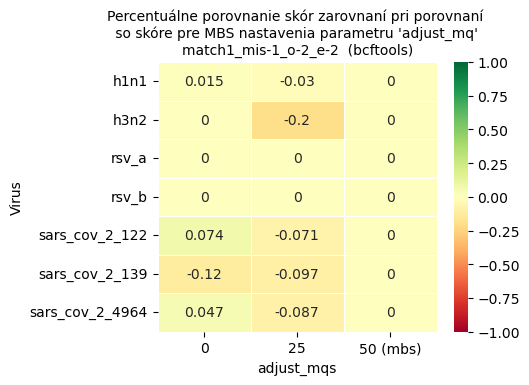

ploidies
Params:  [1, 2]


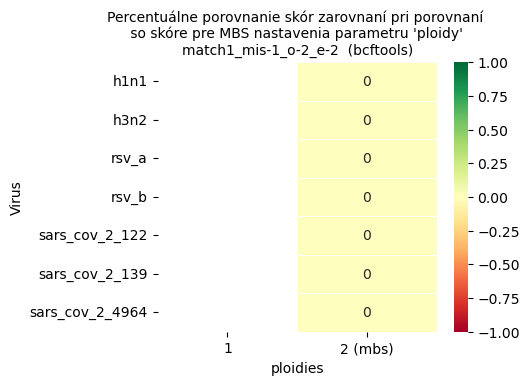


Variant_caller:  freebayes
min_base_qualities
Params:  [0, 10, 13, 20]


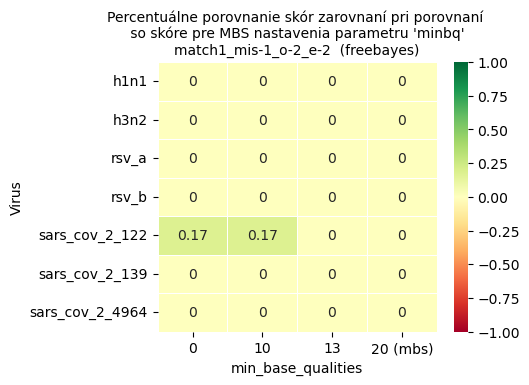

min_map_qualities
Params:  [0, 15, 30]


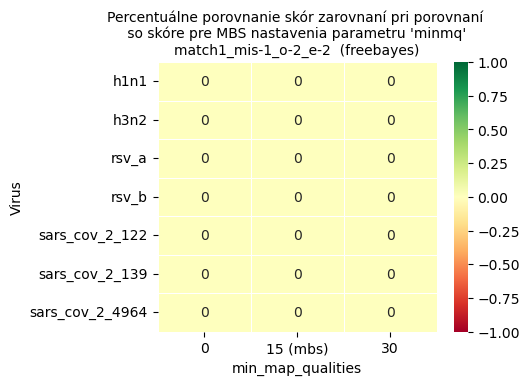

ploidies
Params:  [1, 2]


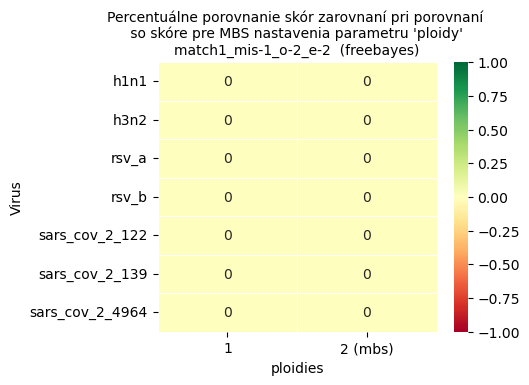


Variant_caller:  ivar
min_base_qualities
Params:  [0, 10, 13, 20]


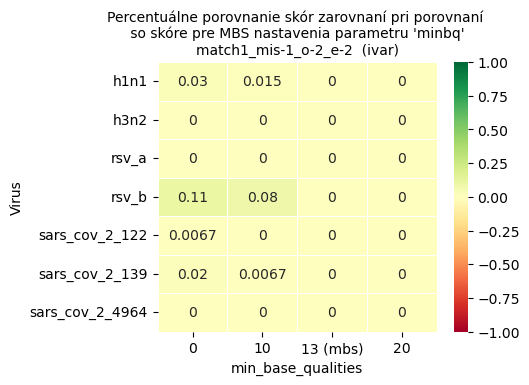

min_map_qualities
Params:  [0, 15, 30]


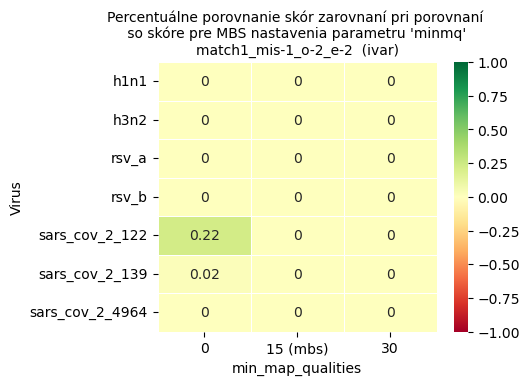

redo_baqs
Params:  [0, 1]


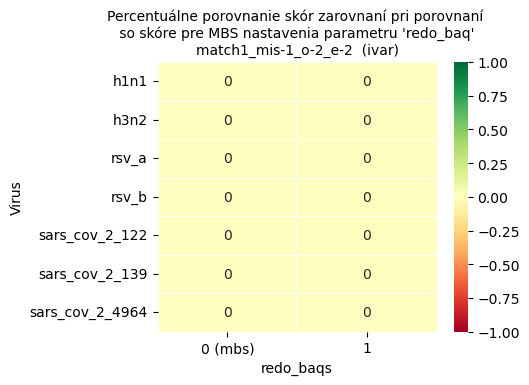

<Figure size 640x480 with 0 Axes>

In [8]:
# Medianove porovania
# pre vsetky skorovacie schemy
for alignment_score in ['match1_mis-1_o-2_e-2']: #alignment_scores: 

    path_to_rd_samples = './data/result_metrics/results_all_viruses/results_all_viruses_' + alignment_score + '_' + date_generated + '_variant_callers.tsv'
    
    for variant_caller in tools_vc:
        print()
        print('Variant_caller: ', variant_caller)

        all_rd_samples = pd.read_csv(path_to_rd_samples, sep='\t')
        all_rd_samples = all_rd_samples[all_rd_samples.variant_caller == variant_caller]
        
        # ake nazvy parametrov, ktorych hodnoty sa menili
        for param_col_name in params_variant_callers[variant_caller]['params_used']: # param_names.keys():
            
            print(param_col_name)
            
            # skratka nazvu, ktora je zapisana v tsv
            param_col = param_abbr[param_col_name]

            # hodnoty testovanych parametrov
            params = params_variant_callers[variant_caller][param_col_name] # param_names[param_abbr[param_col]]
            print('Params: ', params)

            df_column_names = list(params)
            df_column_names.append('virus')
            df_column_names.append('param_name')
            df_column_names.append('variant_caller')


            rd_samples_param_median = pd.DataFrame([[0] * len(df_column_names)], columns=df_column_names)

            # pre vsetky virusy
            for virus_x in samples_names.keys():

                # prazdny df (vyplneny '0')
                virus_param_median = pd.DataFrame([[0] * len(df_column_names)], columns=df_column_names)
                virus_df = all_rd_samples[all_rd_samples.virus == virus_x]

                for param in params:

                    # param_med = virus_df[(virus_df['param'] == param_col) & (virus_df['param_val'] == str(param))].score.median()
                    param_med = virus_df[(virus_df['param'] == param_col) & (virus_df['param_val'] == param)].score.median()

                    virus_param_median[param] = param_med

                # print('median: ', virus_df[virus_df['param'] == 'baseline_params'].score.median(), '. Iba skore: ', virus_df[virus_df['param'] == 'baseline_params'].score.item())
                virus_param_median['mbs'] = virus_df[virus_df['param'] == 'baseline_params'].score.median()
                virus_param_median['virus'] = virus_x
                virus_param_median['param_name'] = param_col
                virus_param_median['variant_caller'] = variant_caller

                rd_samples_param_median = pd.concat([rd_samples_param_median, virus_param_median], ignore_index=True)

            rd_samples_param_median = rd_samples_param_median.drop(0, axis=0)
            
            # print('rd_samples_param_median: ', rd_samples_param_median)

            # pre zobrazenie podielov v heatmape
                
            # mbs_param = mbs_params[param_col]
            df_column_names = list(params)
            df_column_names.append('virus')

            rd_samples_param_median_diff = pd.DataFrame(columns=df_column_names)

            for i, row in rd_samples_param_median.iterrows():

                virus_param_median_diff  = pd.DataFrame([[0] * len(df_column_names)], columns=df_column_names)

                # print('virus_param_median_diff: ', virus_param_median_diff)
                
                for param in params:

                    vz_med = row[param]/row['mbs']
                    vz_med_perc = (vz_med - 1) * 100 # o ake percento sa hodnota zvysila/znizila
                    virus_param_median_diff[param] = vz_med_perc
                    # print(param, ':  ', row[param], '/', row['mbs'], ' = ', vz_med, ' ==> ', vz_med_perc)
                
                virus_param_median_diff['virus'] = row['virus']

                # print('virus_param_median_diff: ', virus_param_median_diff)

                rd_samples_param_median_diff = pd.concat([rd_samples_param_median_diff, virus_param_median_diff], ignore_index=True)
                # print('rd_samples_param_median_diff: ', rd_samples_param_median_diff)


            # ku hodnote mbs nastavenia pridat
            # a vyplnit 0.0 stlpec pre mbs nastavenie parametra
            new_col_name_mbs = str(mbs_set_params_variant_callers[variant_caller][param_col_name]) + ' (mbs)' # aka hodnota je pre dany parameter a pre dany variant caller nastavena ako MBS?

            rd_samples_param_median_diff = rd_samples_param_median_diff.rename(columns={mbs_set_params_variant_callers[variant_caller][param_col_name]: new_col_name_mbs})
            rd_samples_param_median_diff[new_col_name_mbs] = 0.0

            # print(rd_samples_param_median_diff)
            plt.clf()
            # plt.figure(figsize=(9,3))

            # Replace NaN with a specific value (e.g., -1)
            rd_samples_param_median_diff.fillna(-200, inplace=True)
            rd_samples_param_median_diff.set_index('virus', inplace=True)

            # Masking the -1 values
            mask = rd_samples_param_median_diff == -200
            # ax = sns.heatmap(rd_samples_param_median_diff, annot=True, cmap='RdYlGn', linewidths=.5, mask=mask, vmin=-1, vmax=1)
            ax = sns.heatmap(rd_samples_param_median_diff, annot=True, cmap='RdYlGn', linewidths=.5, mask=mask, vmin=-1, vmax=1) # , square=True

            # ax = sns.heatmap(rd_samples_param_median_diff.set_index('virus'), cmap="Blues", annot=True, annot_kws={"size": 9}, fmt=".4f")
            ax.set(xlabel=param_col_name, ylabel="Virus")

            # plot_title = 'Comparison of median of values for used parameter \n to median of scores of parameter for MBS '+ param_col + ' ' + '\n' + alignment_score + trimmer
            # plot_title = 'Porovnanie skore zarovania s MBS skore pre '+ param_col + ' ' + '\n' + alignment_score + '_' + variant_caller
            plot_title = "Percentuálne porovnanie skór zarovnaní pri porovnaní \n so skóre pre MBS nastavenia parametru '" + param_col + "' " + '\n' +  alignment_score + '  (' + variant_caller + ')'
            plt.title(plot_title, fontsize=10)
            plt.gcf().set_size_inches(4.5, 3.5)

            path_to_save_fig = './data/result_metrics/comparison_MBS_params_score/finalne_porovnania/heatmap_' + param_col + '_' + alignment_score + '_' + date_generated + '_' + variant_caller + ".png"
            plt.savefig(path_to_save_fig, bbox_inches='tight')

            plt.show()

            plt.clf()



# Porovnania skore zarovnani pri zmene jedneho parametra so skore zarovania pri pouziti mbs nastavenia pre dany virus -- pre variant callery


Variant_caller:  bcftools
params_variant_callers[variant_caller][params_used]:  ['min_base_qualities', 'min_map_qualities', 'gap_fracs', 'redo_baqs', 'adjust_mqs', 'ploidies']
min_base_qualities
Params:  [0, 10, 13, 20]
h1n1
0 :   13420.0 / 13420.0  =  1.0  ==>  0.0
10 :   13420.0 / 13420.0  =  1.0  ==>  0.0
13 :   13420.0 / 13420.0  =  1.0  ==>  0.0
20 :   13420.0 / 13420.0  =  1.0  ==>  0.0
h3n2
0 :   13177.0 / 13177.0  =  1.0  ==>  0.0
10 :   13177.0 / 13177.0  =  1.0  ==>  0.0
13 :   13177.0 / 13177.0  =  1.0  ==>  0.0
20 :   13175.0 / 13177.0  =  0.9998482203840025  ==>  -0.01517796159975493
rsv_a
0 :   14793.0 / 14793.0  =  1.0  ==>  0.0
10 :   14793.0 / 14793.0  =  1.0  ==>  0.0
13 :   14793.0 / 14793.0  =  1.0  ==>  0.0
20 :   14793.0 / 14793.0  =  1.0  ==>  0.0
rsv_b
0 :   14960.0 / 14960.0  =  1.0  ==>  0.0
10 :   14960.0 / 14960.0  =  1.0  ==>  0.0
13 :   14960.0 / 14960.0  =  1.0  ==>  0.0
20 :   14960.0 / 14960.0  =  1.0  ==>  0.0
sars_cov_2_122
0 :   29797.0 / 29765.0  =

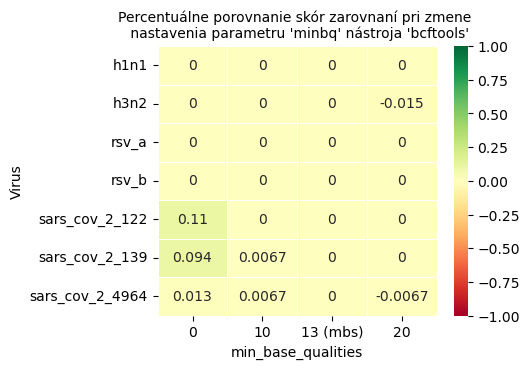

min_map_qualities
Params:  [0, 15, 30]
h1n1
0 :   13420.0 / 13420.0  =  1.0  ==>  0.0
15 :   13420.0 / 13420.0  =  1.0  ==>  0.0
30 :   13420.0 / 13420.0  =  1.0  ==>  0.0
h3n2
0 :   13177.0 / 13177.0  =  1.0  ==>  0.0
15 :   13175.0 / 13177.0  =  0.9998482203840025  ==>  -0.01517796159975493
30 :   13169.0 / 13177.0  =  0.9993928815360097  ==>  -0.06071184639903082
rsv_a
0 :   14793.0 / 14793.0  =  1.0  ==>  0.0
15 :   14793.0 / 14793.0  =  1.0  ==>  0.0
30 :   14793.0 / 14793.0  =  1.0  ==>  0.0
rsv_b
0 :   14960.0 / 14960.0  =  1.0  ==>  0.0
15 :   14960.0 / 14960.0  =  1.0  ==>  0.0
30 :   14960.0 / 14960.0  =  1.0  ==>  0.0
sars_cov_2_122
0 :   29765.0 / 29765.0  =  1.0  ==>  0.0
15 :   29765.0 / 29765.0  =  1.0  ==>  0.0
30 :   29754.0 / 29765.0  =  0.9996304384344028  ==>  -0.036956156559719844
sars_cov_2_139
0 :   29755.0 / 29755.0  =  1.0  ==>  0.0
15 :   29753.0 / 29755.0  =  0.9999327844059822  ==>  -0.006721559401778876
30 :   29744.0 / 29755.0  =  0.999630314232902  ==>  -

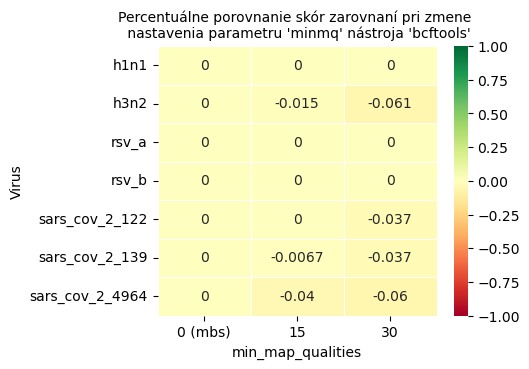

gap_fracs
Params:  [0.002, 0.05, 0.1]
h1n1
0.002 :   13420.0 / 13420.0  =  1.0  ==>  0.0
0.05 :   13420.0 / 13420.0  =  1.0  ==>  0.0
0.1 :   13420.0 / 13420.0  =  1.0  ==>  0.0
h3n2
0.002 :   13177.0 / 13177.0  =  1.0  ==>  0.0
0.05 :   13177.0 / 13177.0  =  1.0  ==>  0.0
0.1 :   13177.0 / 13177.0  =  1.0  ==>  0.0
rsv_a
0.002 :   nan / 14793.0  =  nan  ==>  nan
0.05 :   14793.0 / 14793.0  =  1.0  ==>  0.0
0.1 :   14793.0 / 14793.0  =  1.0  ==>  0.0
rsv_b
0.002 :   14960.0 / 14960.0  =  1.0  ==>  0.0
0.05 :   14960.0 / 14960.0  =  1.0  ==>  0.0
0.1 :   14960.0 / 14960.0  =  1.0  ==>  0.0
sars_cov_2_122
0.002 :   nan / 29765.0  =  nan  ==>  nan
0.05 :   29765.0 / 29765.0  =  1.0  ==>  0.0
0.1 :   29765.0 / 29765.0  =  1.0  ==>  0.0
sars_cov_2_139
0.002 :   nan / 29755.0  =  nan  ==>  nan
0.05 :   29755.0 / 29755.0  =  1.0  ==>  0.0
0.1 :   29755.0 / 29755.0  =  1.0  ==>  0.0
sars_cov_2_4964
0.002 :   nan / 29829.0  =  nan  ==>  nan
0.05 :   29829.0 / 29829.0  =  1.0  ==>  0.0
0.1 :   2

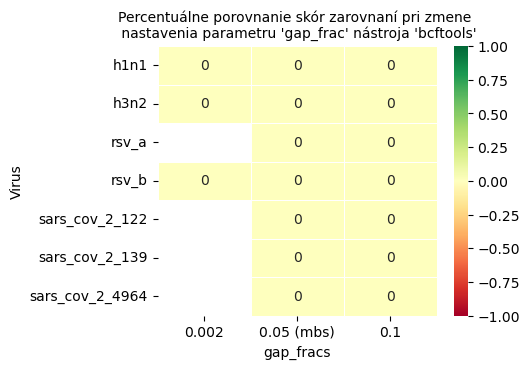

redo_baqs
Params:  [0, 1]
h1n1
0 :   13420.0 / 13420.0  =  1.0  ==>  0.0
1 :   13420.0 / 13420.0  =  1.0  ==>  0.0
h3n2
0 :   13177.0 / 13177.0  =  1.0  ==>  0.0
1 :   13177.0 / 13177.0  =  1.0  ==>  0.0
rsv_a
0 :   14793.0 / 14793.0  =  1.0  ==>  0.0
1 :   14793.0 / 14793.0  =  1.0  ==>  0.0
rsv_b
0 :   14960.0 / 14960.0  =  1.0  ==>  0.0
1 :   14960.0 / 14960.0  =  1.0  ==>  0.0
sars_cov_2_122
0 :   29765.0 / 29765.0  =  1.0  ==>  0.0
1 :   29765.0 / 29765.0  =  1.0  ==>  0.0
sars_cov_2_139
0 :   29755.0 / 29755.0  =  1.0  ==>  0.0
1 :   29755.0 / 29755.0  =  1.0  ==>  0.0
sars_cov_2_4964
0 :   29829.0 / 29829.0  =  1.0  ==>  0.0
1 :   29829.0 / 29829.0  =  1.0  ==>  0.0
Change name of mbs column:  1  to:  1 (mbs)
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
Name: 1 (mbs), dtype: float64


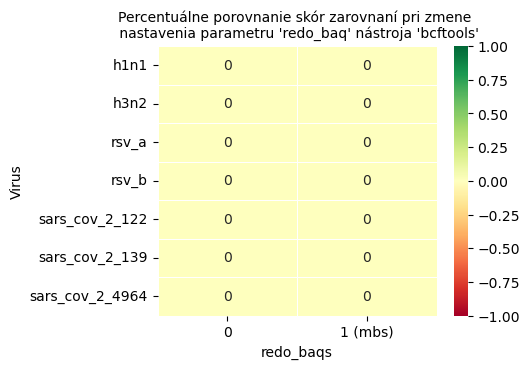

adjust_mqs
Params:  [0, 25, 50]
h1n1
0 :   13422.0 / 13420.0  =  1.0001490312965722  ==>  0.01490312965721774
25 :   13416.0 / 13420.0  =  0.9997019374068554  ==>  -0.029806259314457684
50 :   13420.0 / 13420.0  =  1.0  ==>  0.0
h3n2
0 :   13177.0 / 13177.0  =  1.0  ==>  0.0
25 :   13151.0 / 13177.0  =  0.9980268649920315  ==>  -0.1973135007968474
50 :   13177.0 / 13177.0  =  1.0  ==>  0.0
rsv_a
0 :   14793.0 / 14793.0  =  1.0  ==>  0.0
25 :   14793.0 / 14793.0  =  1.0  ==>  0.0
50 :   14793.0 / 14793.0  =  1.0  ==>  0.0
rsv_b
0 :   14960.0 / 14960.0  =  1.0  ==>  0.0
25 :   14960.0 / 14960.0  =  1.0  ==>  0.0
50 :   14960.0 / 14960.0  =  1.0  ==>  0.0
sars_cov_2_122
0 :   29787.0 / 29765.0  =  1.0007391231311944  ==>  0.07391231311943969
25 :   29744.0 / 29765.0  =  0.9992944733747691  ==>  -0.07055266252309345
50 :   29765.0 / 29765.0  =  1.0  ==>  0.0
sars_cov_2_139
0 :   29719.0 / 29755.0  =  0.9987901193076794  ==>  -0.12098806923206418
25 :   29726.0 / 29755.0  =  0.9990253738867

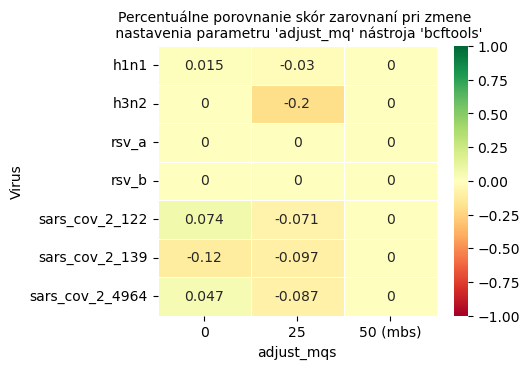

ploidies
Params:  [1, 2]
h1n1
1 :   nan / 13420.0  =  nan  ==>  nan
2 :   13420.0 / 13420.0  =  1.0  ==>  0.0
h3n2
1 :   nan / 13177.0  =  nan  ==>  nan
2 :   13177.0 / 13177.0  =  1.0  ==>  0.0
rsv_a
1 :   nan / 14793.0  =  nan  ==>  nan
2 :   14793.0 / 14793.0  =  1.0  ==>  0.0
rsv_b
1 :   nan / 14960.0  =  nan  ==>  nan
2 :   14960.0 / 14960.0  =  1.0  ==>  0.0
sars_cov_2_122
1 :   nan / 29765.0  =  nan  ==>  nan
2 :   29765.0 / 29765.0  =  1.0  ==>  0.0
sars_cov_2_139
1 :   nan / 29755.0  =  nan  ==>  nan
2 :   29755.0 / 29755.0  =  1.0  ==>  0.0
sars_cov_2_4964
1 :   nan / 29829.0  =  nan  ==>  nan
2 :   29829.0 / 29829.0  =  1.0  ==>  0.0
Change name of mbs column:  2  to:  2 (mbs)
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
Name: 2 (mbs), dtype: float64


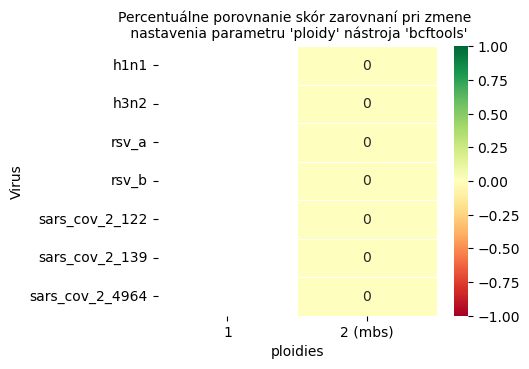


Variant_caller:  freebayes
params_variant_callers[variant_caller][params_used]:  ['min_base_qualities', 'min_map_qualities', 'ploidies']
min_base_qualities
Params:  [0, 10, 13, 20]
h1n1
0 :   13422.0 / 13422.0  =  1.0  ==>  0.0
10 :   13422.0 / 13422.0  =  1.0  ==>  0.0
13 :   13422.0 / 13422.0  =  1.0  ==>  0.0
20 :   13422.0 / 13422.0  =  1.0  ==>  0.0
h3n2
0 :   13179.0 / 13179.0  =  1.0  ==>  0.0
10 :   13179.0 / 13179.0  =  1.0  ==>  0.0
13 :   13179.0 / 13179.0  =  1.0  ==>  0.0
20 :   13179.0 / 13179.0  =  1.0  ==>  0.0
rsv_a
0 :   14793.0 / 14793.0  =  1.0  ==>  0.0
10 :   14793.0 / 14793.0  =  1.0  ==>  0.0
13 :   14793.0 / 14793.0  =  1.0  ==>  0.0
20 :   14793.0 / 14793.0  =  1.0  ==>  0.0
rsv_b
0 :   14960.0 / 14960.0  =  1.0  ==>  0.0
10 :   14960.0 / 14960.0  =  1.0  ==>  0.0
13 :   14960.0 / 14960.0  =  1.0  ==>  0.0
20 :   14960.0 / 14960.0  =  1.0  ==>  0.0
sars_cov_2_122
0 :   29827.0 / 29775.0  =  1.0017464315701092  ==>  0.17464315701092303
10 :   29827.0 / 29775.0

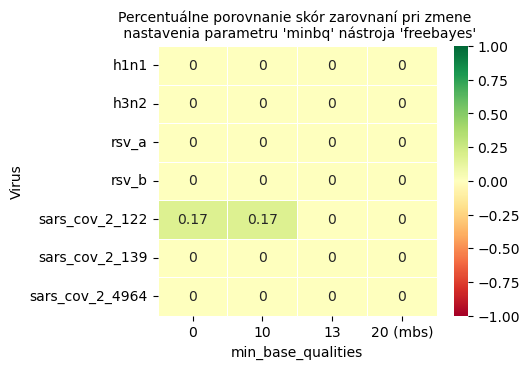

min_map_qualities
Params:  [0, 15, 30]
h1n1
0 :   13422.0 / 13422.0  =  1.0  ==>  0.0
15 :   13422.0 / 13422.0  =  1.0  ==>  0.0
30 :   13422.0 / 13422.0  =  1.0  ==>  0.0
h3n2
0 :   13179.0 / 13179.0  =  1.0  ==>  0.0
15 :   13179.0 / 13179.0  =  1.0  ==>  0.0
30 :   13179.0 / 13179.0  =  1.0  ==>  0.0
rsv_a
0 :   14793.0 / 14793.0  =  1.0  ==>  0.0
15 :   14793.0 / 14793.0  =  1.0  ==>  0.0
30 :   14793.0 / 14793.0  =  1.0  ==>  0.0
rsv_b
0 :   14960.0 / 14960.0  =  1.0  ==>  0.0
15 :   14960.0 / 14960.0  =  1.0  ==>  0.0
30 :   14960.0 / 14960.0  =  1.0  ==>  0.0
sars_cov_2_122
0 :   29775.0 / 29775.0  =  1.0  ==>  0.0
15 :   29775.0 / 29775.0  =  1.0  ==>  0.0
30 :   29775.0 / 29775.0  =  1.0  ==>  0.0
sars_cov_2_139
0 :   29743.0 / 29743.0  =  1.0  ==>  0.0
15 :   29743.0 / 29743.0  =  1.0  ==>  0.0
30 :   29743.0 / 29743.0  =  1.0  ==>  0.0
sars_cov_2_4964
0 :   29843.0 / 29843.0  =  1.0  ==>  0.0
15 :   29843.0 / 29843.0  =  1.0  ==>  0.0
30 :   29843.0 / 29843.0  =  1.0  ==>  0

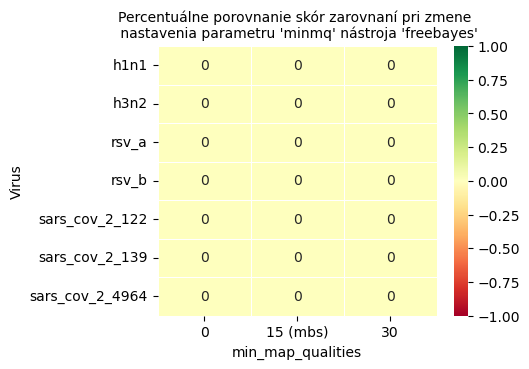

ploidies
Params:  [1, 2]
h1n1
1 :   13422.0 / 13422.0  =  1.0  ==>  0.0
2 :   13422.0 / 13422.0  =  1.0  ==>  0.0
h3n2
1 :   13179.0 / 13179.0  =  1.0  ==>  0.0
2 :   13179.0 / 13179.0  =  1.0  ==>  0.0
rsv_a
1 :   14793.0 / 14793.0  =  1.0  ==>  0.0
2 :   14793.0 / 14793.0  =  1.0  ==>  0.0
rsv_b
1 :   14960.0 / 14960.0  =  1.0  ==>  0.0
2 :   14960.0 / 14960.0  =  1.0  ==>  0.0
sars_cov_2_122
1 :   29775.0 / 29775.0  =  1.0  ==>  0.0
2 :   29775.0 / 29775.0  =  1.0  ==>  0.0
sars_cov_2_139
1 :   29743.0 / 29743.0  =  1.0  ==>  0.0
2 :   29743.0 / 29743.0  =  1.0  ==>  0.0
sars_cov_2_4964
1 :   29843.0 / 29843.0  =  1.0  ==>  0.0
2 :   29843.0 / 29843.0  =  1.0  ==>  0.0
Change name of mbs column:  2  to:  2 (mbs)
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
Name: 2 (mbs), dtype: float64


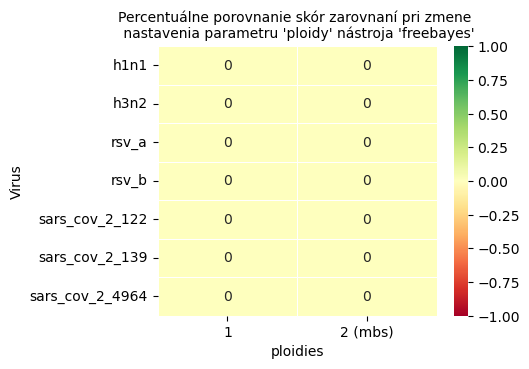


Variant_caller:  ivar
params_variant_callers[variant_caller][params_used]:  ['min_base_qualities', 'min_map_qualities', 'redo_baqs']
min_base_qualities
Params:  [0, 10, 13, 20]
h1n1
0 :   13418.0 / 13414.0  =  1.000298195914716  ==>  0.029819591471591522
10 :   13416.0 / 13414.0  =  1.000149097957358  ==>  0.014909795735795761
13 :   13414.0 / 13414.0  =  1.0  ==>  0.0
20 :   13414.0 / 13414.0  =  1.0  ==>  0.0
h3n2
0 :   13179.0 / 13179.0  =  1.0  ==>  0.0
10 :   13179.0 / 13179.0  =  1.0  ==>  0.0
13 :   13179.0 / 13179.0  =  1.0  ==>  0.0
20 :   13179.0 / 13179.0  =  1.0  ==>  0.0
rsv_a
0 :   15221.0 / 15221.0  =  1.0  ==>  0.0
10 :   15221.0 / 15221.0  =  1.0  ==>  0.0
13 :   15221.0 / 15221.0  =  1.0  ==>  0.0
20 :   15221.0 / 15221.0  =  1.0  ==>  0.0
rsv_b
0 :   15100.0 / 15084.0  =  1.0010607265977194  ==>  0.10607265977193858
10 :   15096.0 / 15084.0  =  1.0007955449482895  ==>  0.07955449482894839
13 :   15084.0 / 15084.0  =  1.0  ==>  0.0
20 :   15084.0 / 15084.0  =  1.0  =

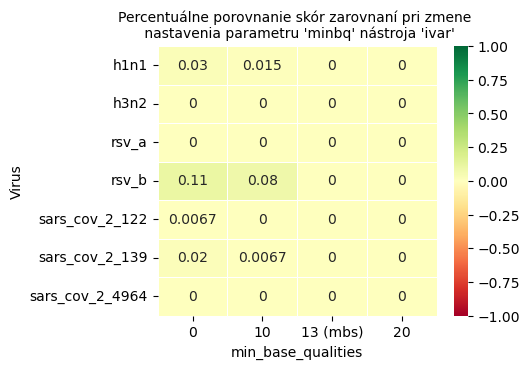

min_map_qualities
Params:  [0, 15, 30]
h1n1
0 :   13414.0 / 13414.0  =  1.0  ==>  0.0
15 :   13414.0 / 13414.0  =  1.0  ==>  0.0
30 :   13414.0 / 13414.0  =  1.0  ==>  0.0
h3n2
0 :   13179.0 / 13179.0  =  1.0  ==>  0.0
15 :   13179.0 / 13179.0  =  1.0  ==>  0.0
30 :   13179.0 / 13179.0  =  1.0  ==>  0.0
rsv_a
0 :   15221.0 / 15221.0  =  1.0  ==>  0.0
15 :   15221.0 / 15221.0  =  1.0  ==>  0.0
30 :   15221.0 / 15221.0  =  1.0  ==>  0.0
rsv_b
0 :   15084.0 / 15084.0  =  1.0  ==>  0.0
15 :   15084.0 / 15084.0  =  1.0  ==>  0.0
30 :   15084.0 / 15084.0  =  1.0  ==>  0.0
sars_cov_2_122
0 :   29825.0 / 29759.0  =  1.0022178164588864  ==>  0.22178164588864124
15 :   29759.0 / 29759.0  =  1.0  ==>  0.0
30 :   29759.0 / 29759.0  =  1.0  ==>  0.0
sars_cov_2_139
0 :   29801.0 / 29795.0  =  1.0002013760698103  ==>  0.020137606981029954
15 :   29795.0 / 29795.0  =  1.0  ==>  0.0
30 :   29795.0 / 29795.0  =  1.0  ==>  0.0
sars_cov_2_4964
0 :   29843.0 / 29843.0  =  1.0  ==>  0.0
15 :   29843.0 / 298

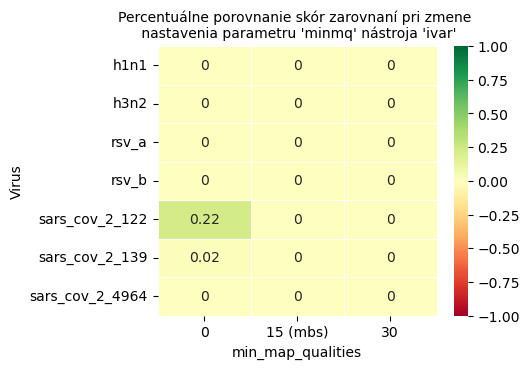

redo_baqs
Params:  [0, 1]
h1n1
0 :   13414.0 / 13414.0  =  1.0  ==>  0.0
1 :   13414.0 / 13414.0  =  1.0  ==>  0.0
h3n2
0 :   13179.0 / 13179.0  =  1.0  ==>  0.0
1 :   13179.0 / 13179.0  =  1.0  ==>  0.0
rsv_a
0 :   15221.0 / 15221.0  =  1.0  ==>  0.0
1 :   15221.0 / 15221.0  =  1.0  ==>  0.0
rsv_b
0 :   15084.0 / 15084.0  =  1.0  ==>  0.0
1 :   15084.0 / 15084.0  =  1.0  ==>  0.0
sars_cov_2_122
0 :   29759.0 / 29759.0  =  1.0  ==>  0.0
1 :   29759.0 / 29759.0  =  1.0  ==>  0.0
sars_cov_2_139
0 :   29795.0 / 29795.0  =  1.0  ==>  0.0
1 :   29795.0 / 29795.0  =  1.0  ==>  0.0
sars_cov_2_4964
0 :   29843.0 / 29843.0  =  1.0  ==>  0.0
1 :   29843.0 / 29843.0  =  1.0  ==>  0.0
Change name of mbs column:  0  to:  0 (mbs)
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
Name: 0 (mbs), dtype: float64


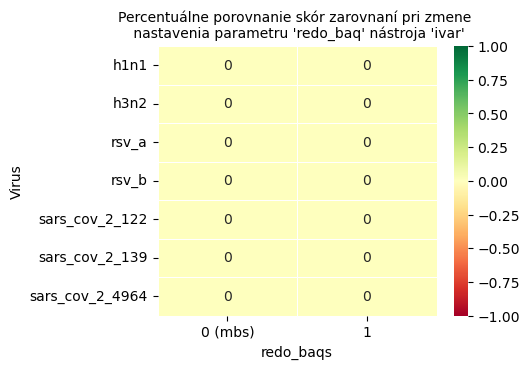

<Figure size 640x480 with 0 Axes>

In [38]:
# pre vsetky skorovacie schemy
for alignment_score in ['match1_mis-1_o-2_e-2']: #alignment_scores: 

    path_to_rd_samples = './data/result_metrics/results_all_viruses/results_all_viruses_' + alignment_score + '_' + date_generated + '_variant_callers.tsv'
    
    for variant_caller in tools_vc:
        print()
        print('Variant_caller: ', variant_caller)

        all_rd_samples = pd.read_csv(path_to_rd_samples, sep='\t')
        all_rd_samples = all_rd_samples[all_rd_samples.variant_caller == variant_caller]
        
        print('params_variant_callers[variant_caller][params_used]: ', params_variant_callers[variant_caller]['params_used'])
        # ake nazvy parametrov, ktorych hodnoty sa menili
        for param_col_name in params_variant_callers[variant_caller]['params_used']: # param_names.keys():
            
            print(param_col_name)
            
            # skratka nazvu, ktora je zapisana v tsv
            param_col = param_abbr[param_col_name]

            # hodnoty testovanych parametrov
            params = params_variant_callers[variant_caller][param_col_name] # param_names[param_abbr[param_col]]
            print('Params: ', params)

            df_column_names = list(params)
            df_column_names.append('virus')


            rd_samples_param_comparison = pd.DataFrame([[0] * len(df_column_names)], columns=df_column_names)


            # pre vsetky virusy
            for virus_x in samples_names.keys():

                print(virus_x)

                # prazdny df (vyplneny '0')
                virus_param_comparison = pd.DataFrame([[0] * len(df_column_names)], columns=df_column_names)
                virus_df = all_rd_samples[all_rd_samples.virus == virus_x]

                for param in params:

                    mbs_score = virus_df[virus_df['param'] == 'baseline_params'].score.item()

                    if mbs_set_params_variant_callers[variant_caller][param_col_name] == param:
                        param_score = mbs_score
                        
                    else:
                        if not virus_df[(virus_df['param'] == param_col) & (virus_df['param_val'] == str(param))].shape[0] == 0:
                            param_score = virus_df[(virus_df['param'] == param_col) & (virus_df['param_val'] == str(param))].score.item()
                        else:
                            param_score = np.nan             

                    param_diff = param_score / mbs_score
                    param_diff_perc = (param_diff - 1) * 100 # o ake percento sa hodnota zvysila/znizila
                    virus_param_comparison[param] = param_diff_perc
                    print(param, ':  ', param_score, '/', mbs_score, ' = ', param_diff, ' ==> ', param_diff_perc)
                

                virus_param_comparison['virus'] = virus_x

                rd_samples_param_comparison = pd.concat([rd_samples_param_comparison, virus_param_comparison], ignore_index=True)

            rd_samples_param_comparison = rd_samples_param_comparison.drop(0, axis=0)

            # ku hodnote mbs nastavenia pridat
            # a vyplnit 0.0 stlpec pre mbs nastavenie parametra
            new_col_name_mbs = str(mbs_set_params_variant_callers[variant_caller][param_col_name]) + ' (mbs)' # aka hodnota je pre dany parameter a pre dany variant caller nastavena ako MBS?

            print('Change name of mbs column: ', mbs_set_params_variant_callers[variant_caller][param_col_name], ' to: ', new_col_name_mbs)
            rd_samples_param_comparison = rd_samples_param_comparison.rename(columns={mbs_set_params_variant_callers[variant_caller][param_col_name]: new_col_name_mbs})
            # rd_samples_param_comparison[new_col_name_mbs] = 0.0
            print(rd_samples_param_comparison[new_col_name_mbs])

            plt.clf()
            # plt.figure(figsize=(9,3))

            # Replace NaN with a specific value (e.g., -1)
            rd_samples_param_comparison.fillna(-200, inplace=True)
            rd_samples_param_comparison.set_index('virus', inplace=True)

            # Masking the -1 values
            mask = rd_samples_param_comparison == -200
            # ax = sns.heatmap(rd_samples_param_median_diff, annot=True, cmap='RdYlGn', linewidths=.5, mask=mask, vmin=-1, vmax=1)
            ax = sns.heatmap(rd_samples_param_comparison, annot=True, cmap='RdYlGn', linewidths=.5, mask=mask, vmin=-1, vmax=1) # , square=True

            # ax = sns.heatmap(rd_samples_param_median_diff.set_index('virus'), cmap="Blues", annot=True, annot_kws={"size": 9}, fmt=".4f")
            ax.set(xlabel=param_col_name, ylabel="Virus")

            # plot_title = 'Comparison of median of values for used parameter \n to median of scores of parameter for MBS '+ param_col + ' ' + '\n' + alignment_score + trimmer
            # plot_title = 'Porovnanie skore zarovania s MBS skore pre '+ param_col + ' ' + '\n' + alignment_score + '_' + variant_caller
            # plot_title = "Percentuálne porovnanie skór zarovnaní pri zmene parametru '" + param_col + "' \n so skóre pri baseline nastavení parametru '" + param_col + "' " + '\n' +  alignment_score + '  (' + variant_caller + ')'
            plot_title = "Percentuálne porovnanie skór zarovnaní pri zmene \n nastavenia parametru '" + param_col + "' nástroja '" + variant_caller + "'"
            plt.title(plot_title, fontsize=10)
            plt.gcf().set_size_inches(4.5, 3.5)

            path_to_save_fig = './data/result_metrics/comparison_MBS_params_score/finalne_porovnania/heatmap_' + param_col + '_' + alignment_score + '_' + date_generated + '_' + variant_caller + ".png"
            plt.savefig(path_to_save_fig, bbox_inches='tight')

            plt.show()

            plt.clf()


In [7]:
virus_df

virus variant_caller            param param_val    score  \
168  sars_cov_2_4964           ivar            minbq         0  29843.0   
169  sars_cov_2_4964           ivar            minbq        10  29843.0   
170  sars_cov_2_4964           ivar            minbq        20  29843.0   
171  sars_cov_2_4964           ivar            minmq         0  29843.0   
172  sars_cov_2_4964           ivar            minmq        30  29843.0   
173  sars_cov_2_4964           ivar         redo_baq         1  29843.0   
174  sars_cov_2_4964           ivar  baseline_params         -  29843.0   

     match  gap  mismatch  N_count  score_agg  sample_id  \
168  29845    0         2        2    29841.0       4964   
169  29845    0         2        2    29841.0       4964   
170  29845    0         2        2    29841.0       4964   
171  29845    0         2        2    29841.0       4964   
172  29845    0         2        2    29841.0       4964   
173  29845    0         2        2    29841.0       4964   
174  29845    0         2        2    29841.0       4964   

    pairwiseAligner_set_score consensus_baseline consensus_baseline_virus  
168      match1_mis-1_o-2_e-2                NaN                      NaN  
169      match1_mis-1_o-2_e-2                NaN                      NaN  
170      match1_mis-1_o-2_e-2                NaN                      NaN  
171      match1_mis-1_o-2_e-2                NaN                      NaN  
172      match1_mis-1_o-2_e-2                NaN                      NaN  
173      match1_mis-1_o-2_e-2                NaN                      NaN  
174      match1_mis-1_o-2_e-2                MBS      MBS_sars_cov_2_4964